# Final Project Submission

Please fill out:
* Student name: Robert Cauvy
* Student pace: Self paced
* Scheduled project review date/time: 11/05/21 10:00AM ET
* Instructor name: James Irving 


## TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>
 
- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
___

# INTRODUCTION

## Business Problem

King County Residents want to renovate their home to increase its resale value but don't know what factors are important for determining a home's value.

The AMCE Real Estate Advisory will provide the client with three things they can do to their property that can increase their property's resale value the most.

By analyzing real estate sales data from the county we will be able to provide the client with insights as to what renovation projects can most increase their property's value.

# OBTAIN

## Data Understanding

This project will leverage a data set containing sale prices of homes in King County, WA to advise homeowners decide which renovation projects would increase the resale potential of their home.

The data spans just over year, from May 2014 to 2015 and includes over 20,000 house sales.

Since our clients are most concerned with increasing their home's resale value Price will be used as the target variable, and will explore all of the other features of the dataset as predictor variables. These independent features include square footage, grade, condition, and number of bedrooms and bathrooms.


In [31]:
import pandas as pd
pd.set_option('display.max_columns',0)
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
from scipy import stats
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import and read the dataset
df = pd.read_csv('data/kc_house_data.csv',index_col=0)
df

date     price  bedrooms  ...    long  sqft_living15  sqft_lot15
id                                          ...                                   
7129300520  10/13/2014 221900.00         3  ... -122.26           1340        5650
6414100192   12/9/2014 538000.00         3  ... -122.32           1690        7639
5631500400   2/25/2015 180000.00         2  ... -122.23           2720        8062
2487200875   12/9/2014 604000.00         4  ... -122.39           1360        5000
1954400510   2/18/2015 510000.00         3  ... -122.05           1800        7503
...                ...       ...       ...  ...     ...            ...         ...
263000018    5/21/2014 360000.00         3  ... -122.35           1530        1509
6600060120   2/23/2015 400000.00         4  ... -122.36           1830        7200
1523300141   6/23/2014 402101.00         2  ... -122.30           1020        2007
291310100    1/16/2015 400000.00         3  ... -122.07           1410        1287
1523300157  10/15/2014 325000.00         2  ... -122.30           1020        1357

[21597 rows x 20 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

Looks like there are a few missing values that must be addressed and some data types that will need to be changed.

In [4]:
#Convert to dates from string to datetime type
df['date'] = pd.to_datetime(df['date'])


In [5]:
#Examine the range of dates in the data 
print(df['date'].min())
print(df['date'].max())

2014-05-02 00:00:00
2015-05-27 00:00:00


The data includes house sales in King County and spans roughly over a year from May 2014-2015. The data includes 21597 records.

According to the data glossary, 'view' refers to how many showings the property had prior to its sale. Since this is not a feature of the home we'll drop it.

'Condition' and 'Grade' definitions can be found on the The King County's official site. The glossary on page 26 describes condition and grade as the following:

* Condition: Relative to Age and Grade

    1= Poor Many repairs needed. Showing serious deterioration.
    
    2= Fair Some repairs needed immediately. Much deferred maintenance.
    
    3= Average Depending upon age of improvement; normal amount of upkeep for the age of the home.
    
    4= Good Condition above the norm for the age of the home. Indicates extra attention and care has been taken to maintain.
    
    5= Very Good Excellent maintenance and updating on home. Not a total renovation.

* Residential Building Grades

    Grades 1 - 3 Falls short of minimum building standards. Normally cabin or inferior structure.
    
    Grade 4 Generally older low quality construction. Does not meet code.

    Grade 5 Lower construction costs and workmanship. Small, simple design.
    
    Grade 6 Lowest grade currently meeting building codes. Low quality materials, simple designs.

    Grade 7 Average grade of construction and design. Commonly seen in plats and older subdivisions.

    Grade 8 Just above average in construction and design. Usually better materials in both the exterior and interior finishes.
    
    Grade 9 Better architectural design, with extra exterior and interior design and quality.
    
    Grade 10 Homes of this quality generally have high quality features. Finish work is better, and more design quality is seen in the floor plans and larger square footage.

    Grade 11 Custom design and higher quality finish work, with added amenities of solid woods, bathroom fixtures and more luxurious options.

    Grade 12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

    Grade 13 Generally custom designed and built. Approaching the Mansion level. Large amount of highest quality cabinet work, wood trim and marble; large entries
    
    
Source: https://www.kingcounty.gov/depts/assessor/Reports/area-reports/2020/residential-westcentral/~/media/depts/assessor/documents/AreaReports/2020/Residential/013.ashx

# SCRUB

In [6]:
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

After checking for missing values. The columns that require scrubbing are _waterfront, view and yr_renovated._ 

In [7]:
df['waterfront'] = df['waterfront'].fillna(0)

It's fair to assume records missing a value for _waterfront_ do not contain this feature.

In [8]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)

Values missing for _yr_renovated_ can be assumed to have not been renovated.

In [9]:
df.drop(['date'],axis=1,inplace=True)

Since we already know the data set contains sale records from May 2014 to May 2015 we will not require this column.

In [10]:
df.drop(['view'],axis=1,inplace=True)

_view_ is described by the number of showings for the property. This column will also be dropped.

In [11]:
df['sqft_basement'].replace('?',value=0,inplace=True)

There was a placeholder for unknown values in this column. If there is no value for basement footage it will be assumed to not have a basement.

In [12]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'],errors='coerce')

In [13]:
pd.to_numeric(df['yr_built'],errors='coerce')

id
7129300520    1955
6414100192    1951
5631500400    1933
2487200875    1965
1954400510    1987
              ... 
263000018     2009
6600060120    2014
1523300141    2009
291310100     2004
1523300157    2008
Name: yr_built, Length: 21597, dtype: int64

In [14]:
pd.to_numeric(df['yr_renovated'],errors='coerce')

id
7129300520      0.00
6414100192   1991.00
5631500400      0.00
2487200875      0.00
1954400510      0.00
               ...  
263000018       0.00
6600060120      0.00
1523300141      0.00
291310100       0.00
1523300157      0.00
Name: yr_renovated, Length: 21597, dtype: float64

Changing these columns from to a numeric data types.

In [15]:
df['zipcode'].astype(str)

id
7129300520    98178
6414100192    98125
5631500400    98028
2487200875    98136
1954400510    98074
              ...  
263000018     98103
6600060120    98146
1523300141    98144
291310100     98027
1523300157    98144
Name: zipcode, Length: 21597, dtype: object

Since _zipcode_ is categorical it will be transformed to a string.

## Data Preparation

Here we will do some light feature engineering and prepare the data for initial modeling. This propecess will be iterated upon as the model is fine tuned.

In [16]:
df_cols = list(df.columns)
df_cols

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [17]:
df['renovated'] = np.where(df['yr_renovated'] != 0, 1,0)

Creating a categorical variable for wheter a property has been renovated or not as an alternative to renovation year.

In [18]:
df['renovated'].value_counts()

0    20853
1      744
Name: renovated, dtype: int64

Only a small portion of the dataset has been previously renovated.

In [20]:
df['basement'] = np.where(df['sqft_basement'] != 0, 1,0)

Same process here for basement.

In [21]:
df['age'] = 2021 - df['yr_built']

Using the year built feture to understand the age of the current age of the homes in the dataset.

# EXPLORE

In [22]:
outcome = 'price'
x_cols = list(df.columns)
x_cols.remove('price')

In [23]:
#Checking out features in the dataset against the target variable, Price

def plots(df, col, y='price'):

    fig, axes = plt.subplots(ncols=2,figsize=(12,5))

    sns.regplot(data=df,x=col, y=y,ax=axes[0],line_kws={'color':'red','lw':5},scatter_kws={'alpha':.01})
    sns.histplot(data=df,x=col,discrete=False,ax=axes[1],kde=False)
    axes[0].set(title= col +' vs price', xlabel= col, ylabel='price')
    axes[1].set(title= 'count of ' + col, xlabel= col)
    axes[0].yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
    axes[1].yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.tight_layout();
    

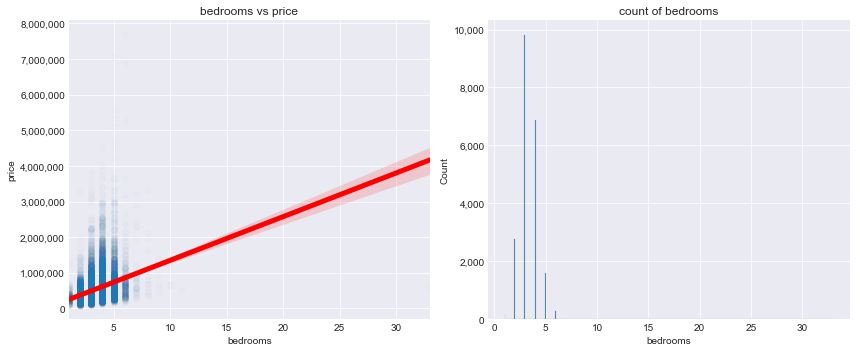

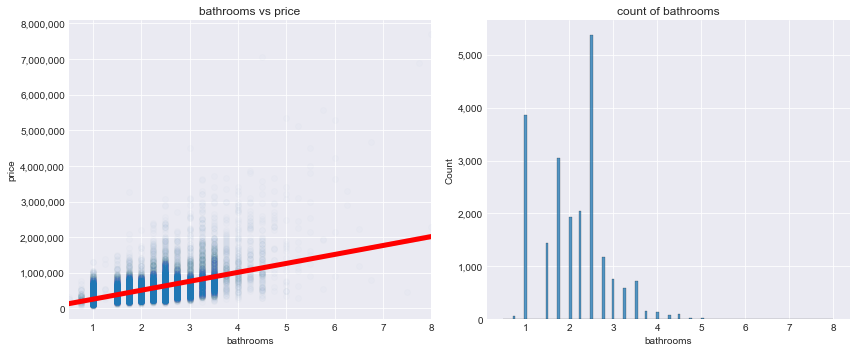

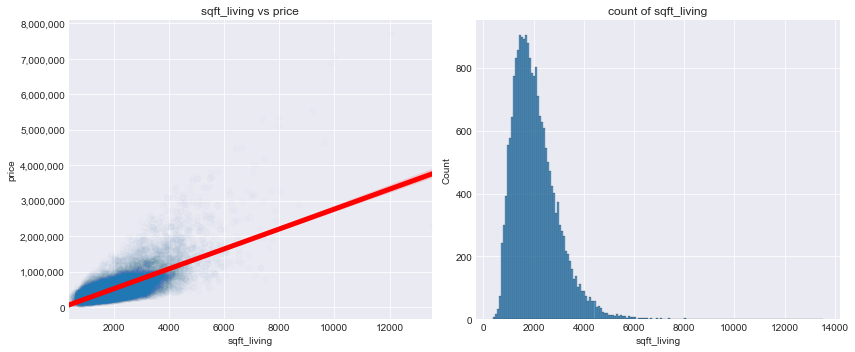

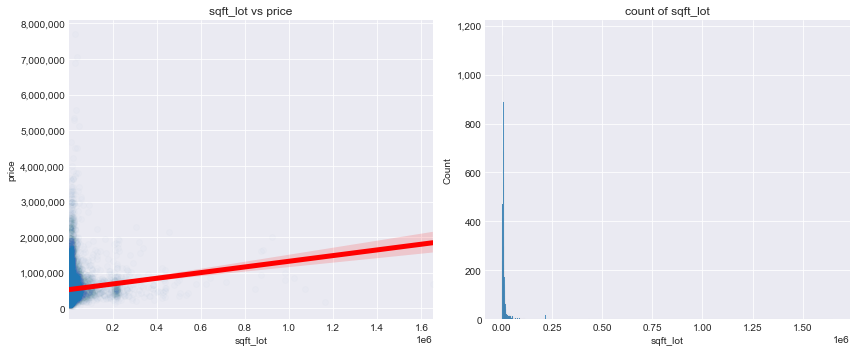

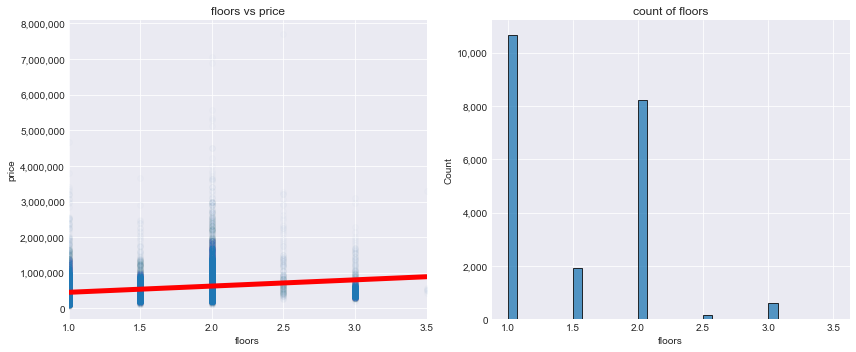

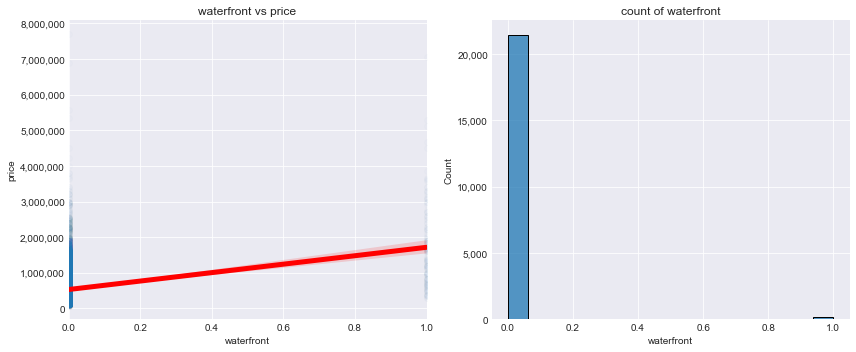

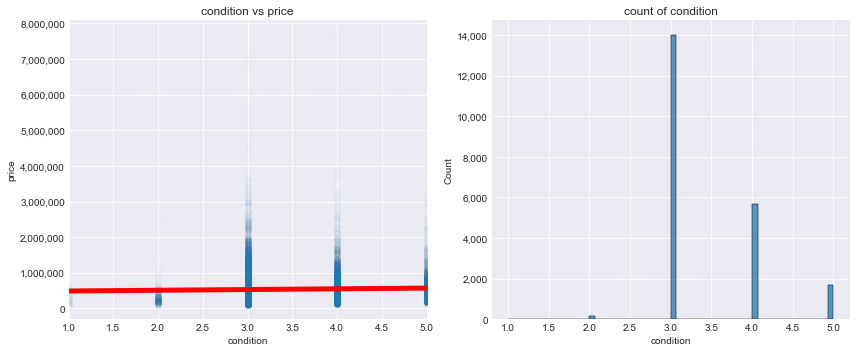

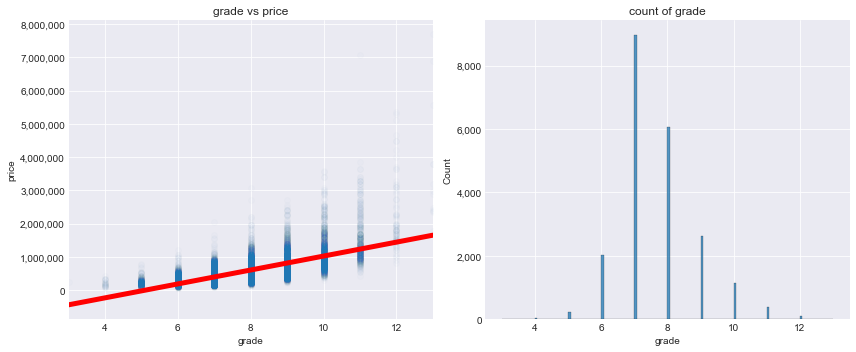

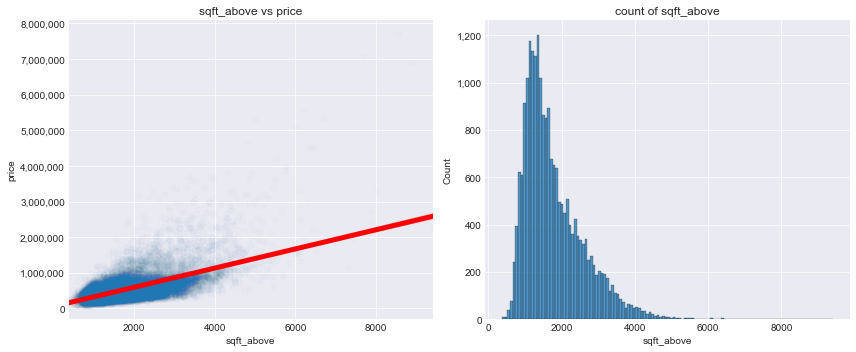

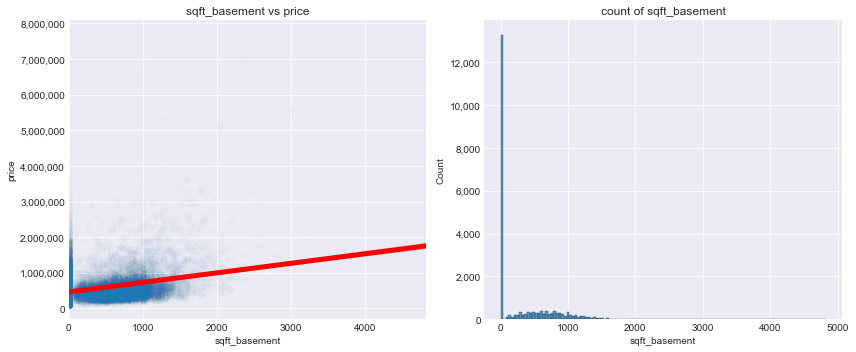

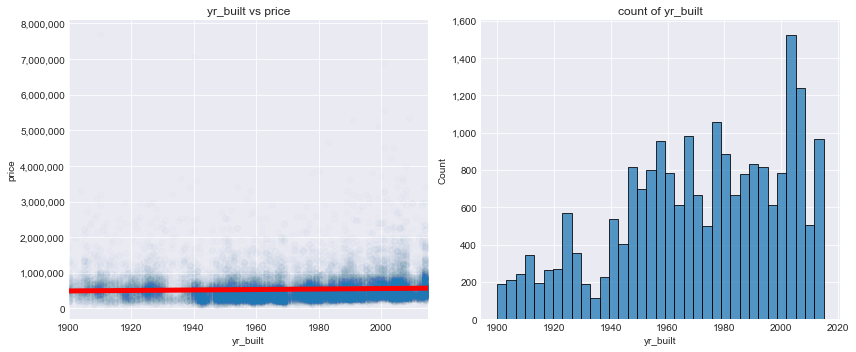

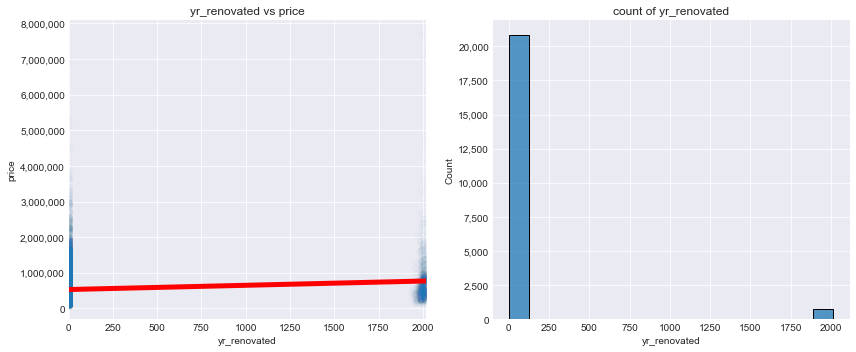

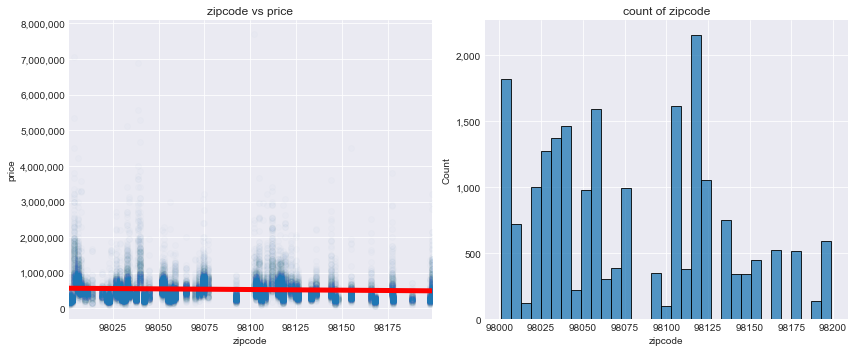

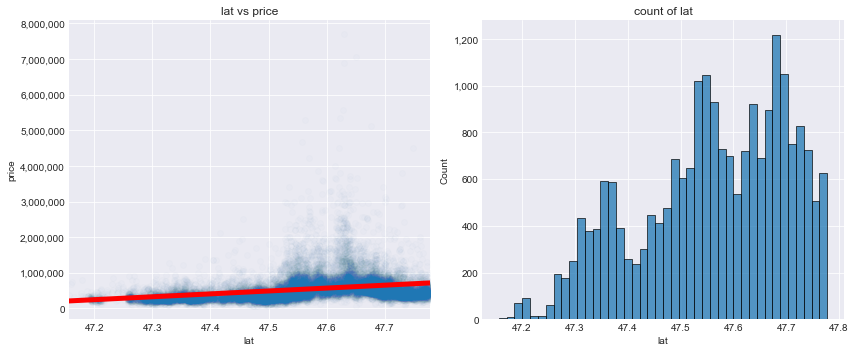

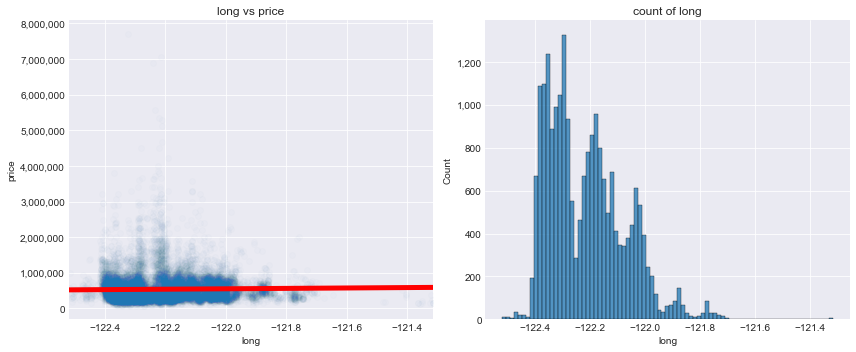

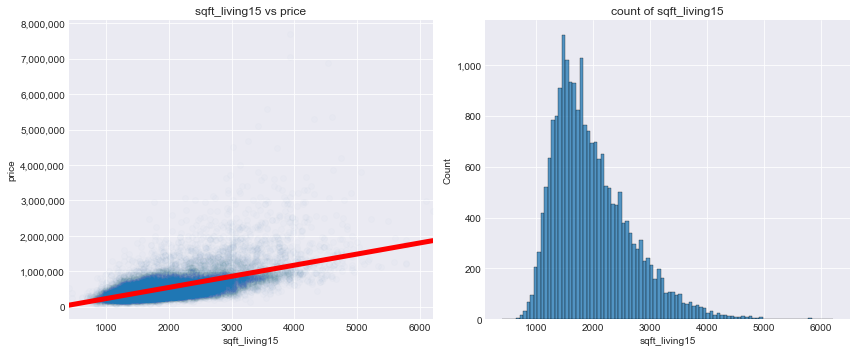

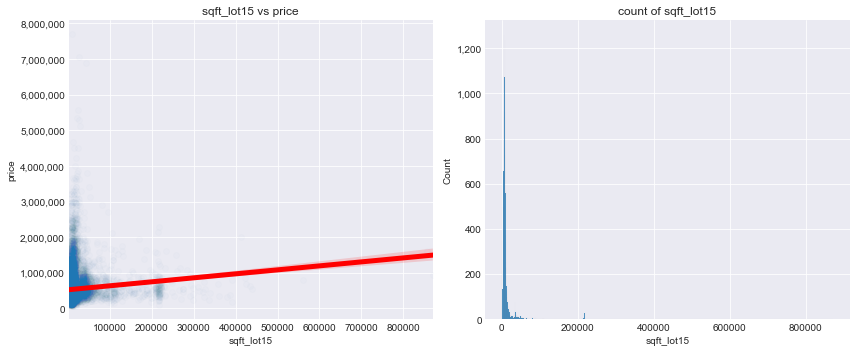

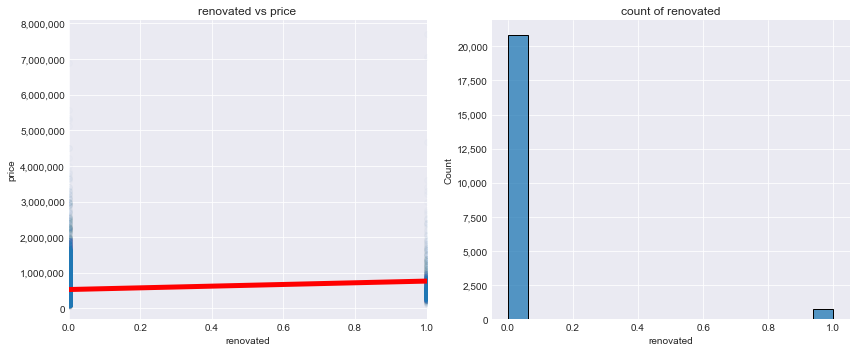

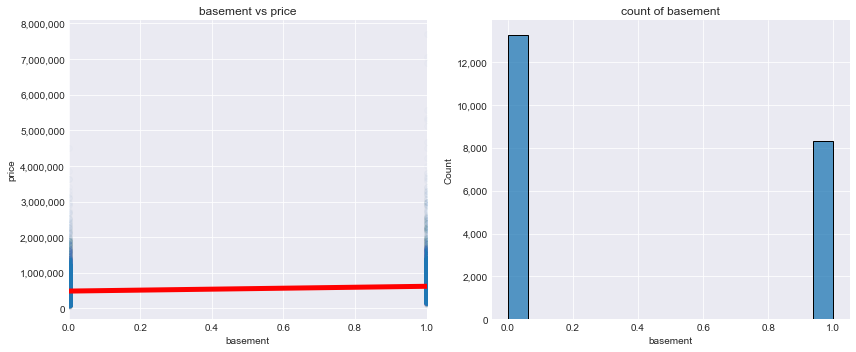

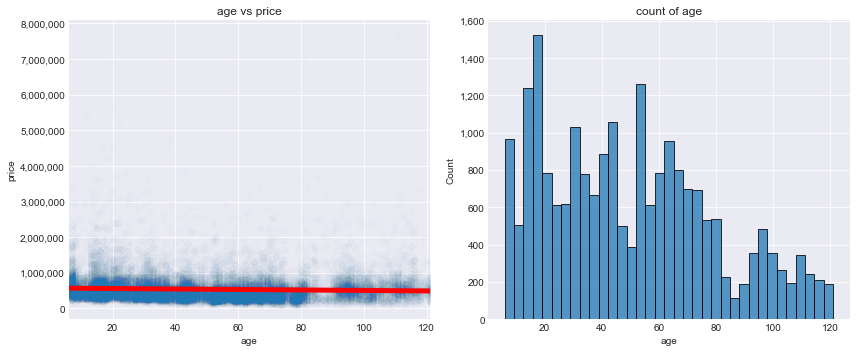

In [24]:
# Checking for Linearity and Distributions
for col in x_cols:
    plots(df, col, y='price')

Upon investigating the linear relationships between the target and predictors, it is clear that some features are categorical (zipcode, condition, waterfront and the features we engineered earlier -- basement, renovated and age.) Other features such as bedrooms, bathrooms, grade and square footages have a positively correlated relationship with price. The others have a complex relationship that need to be further investigated to confirm whether they violate the linearity assumption? There also appears to quite outliers that must be removed. Only the square footage features seem to be somewhat normally distributed but still skew to the right.

In [25]:
corr = df.corr()
corr

price  bedrooms  bathrooms  ...  renovated  basement   age
price           1.00      0.31       0.53  ...       0.12      0.18 -0.05
bedrooms        0.31      1.00       0.51  ...       0.02      0.16 -0.16
bathrooms       0.53      0.51       1.00  ...       0.05      0.16 -0.51
sqft_living     0.70      0.58       0.76  ...       0.05      0.20 -0.32
sqft_lot        0.09      0.03       0.09  ...       0.01     -0.03 -0.05
floors          0.26      0.18       0.50  ...       0.00     -0.25 -0.49
waterfront      0.26     -0.00       0.06  ...       0.07      0.04  0.02
condition       0.04      0.03      -0.13  ...      -0.06      0.13  0.36
grade           0.67      0.36       0.67  ...       0.02      0.05 -0.45
sqft_above      0.61      0.48       0.69  ...       0.02     -0.21 -0.42
sqft_basement   0.32      0.30       0.28  ...       0.06      0.82  0.13
yr_built        0.05      0.16       0.51  ...      -0.20     -0.16 -1.00
yr_renovated    0.12      0.02       0.05  ...       1.00      0.04  0.20
zipcode        -0.05     -0.15      -0.20  ...       0.06      0.16  0.35
lat             0.31     -0.01       0.02  ...       0.03      0.14  0.15
long            0.02      0.13       0.22  ...      -0.06     -0.23 -0.41
sqft_living15   0.59      0.39       0.57  ...       0.00      0.04 -0.33
sqft_lot15      0.08      0.03       0.09  ...       0.00     -0.04 -0.07
renovated       0.12      0.02       0.05  ...       1.00      0.04  0.20
basement        0.18      0.16       0.16  ...       0.04      1.00  0.16
age            -0.05     -0.16      -0.51  ...       0.20      0.16  1.00

[21 rows x 21 columns]

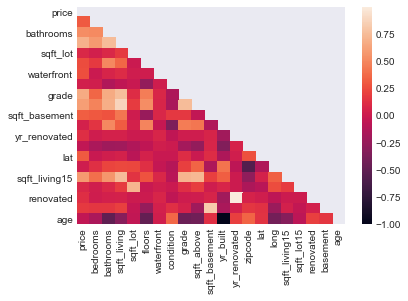

In [26]:
sns.heatmap(corr, mask=np.triu(np.ones_like(corr, dtype=bool)));

In [27]:
price_corrs = df.corr()['price'].map(abs).sort_values(ascending=False)
price_corrs

price           1.00
sqft_living     0.70
grade           0.67
sqft_above      0.61
sqft_living15   0.59
bathrooms       0.53
sqft_basement   0.32
bedrooms        0.31
lat             0.31
waterfront      0.26
floors          0.26
basement        0.18
yr_renovated    0.12
renovated       0.12
sqft_lot        0.09
sqft_lot15      0.08
age             0.05
yr_built        0.05
zipcode         0.05
condition       0.04
long            0.02
Name: price, dtype: float64

Heatmap and correlation table confirms initial views from the regression plots above. Square footage, grade, bathrooms and bedrooms have the highest correlation with the dependent variable.

# MODEL

## Fit Initial Model

In [28]:
# Writing a function to re-use for fitting and iterating models
outcome='price'
cat_cols =[]
def make_model(df,outcome='price', cat_cols=[]):
    x_cols = list(df.columns)
    x_cols.remove(outcome)


    predictors = '+'.join(x_cols)
    formula = outcome + '~' + predictors
    formula

    for col in cat_cols:
        formula = formula.replace(col,f'C({col})')
        
    model = smf.ols(formula=formula, data=df).fit()
    display(model.summary2())
    return model

In [29]:
# A function that produces a QQ-plot and Regression plot to evaluate model
def evaluation(model, df, y='price'):

    fig, axes = plt.subplots(ncols=2,figsize=(12,5))

    sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', ax=axes[0], fit=True)
    sns.regplot(model.predict(df), model.resid,ax=axes[1])
    plt.tight_layout();

# Model 1

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                   OLS                   Adj. R-squared:          0.692      
Dependent Variable:      price                 AIC:                     589383.0327
Date:                    2021-11-04 12:20      BIC:                     589542.6389
No. Observations:        21597                 Log-Likelihood:          -2.9467e+05
Df Model:                19                    F-statistic:             2552.      
Df Residuals:            21577                 Prob (F-statistic):      0.00       
R-squared:               0.692                 Scale:                   4.1595e+10 
-----------------------------------------------------------------------------------
                  Coef.       Std.Err.     t     P>|t|      [0.025        0.975]   
-----------------------------------------------------------------------------------
Intercept           -2.2355      1.4408  -1.5516 0.1208       -5.0597        0.5886
bedrooms        -39778.2166   1920.5593 -20.7118 0.0000   -43542.6548   -36013.7785
bathrooms        43599.3677   3334.3457  13.0758 0.0000    37063.8036    50134.9319
sqft_living        115.8913     18.3419   6.3184 0.0000       79.9398      151.8427
sqft_lot             0.1728      0.0485   3.5601 0.0004        0.0777        0.2680
floors            9535.7170   3649.3607   2.6130 0.0090     2382.7002    16688.7339
waterfront      782630.9328  17220.6172  45.4473 0.0000   748877.2498   816384.6157
condition        28308.0964   2383.2140  11.8781 0.0000    23636.8207    32979.3721
grade           101076.8431   2191.0299  46.1321 0.0000    96782.2625   105371.4237
sqft_above          62.1337     18.2972   3.3958 0.0007       26.2699       97.9976
sqft_basement       60.6977     18.9781   3.1983 0.0014       23.4993       97.8962
yr_built         -3657.1531   1444.1394  -2.5324 0.0113    -6487.7732     -826.5330
yr_renovated      3282.5333    482.7420   6.7998 0.0000     2336.3233     4228.7433
zipcode           -506.4916     33.3341 -15.1944 0.0000     -571.8290     -441.1543
lat             577280.3782  10844.5887  53.2321 0.0000   556024.1825   598536.5739
long           -235060.5549  13351.0540 -17.6061 0.0000  -261229.6079  -208891.5019
sqft_living15       36.0459      3.4536  10.4371 0.0000       29.2765       42.8153
sqft_lot15          -0.3797      0.0743  -5.1087 0.0000       -0.5254       -0.2340
renovated     -6500001.8055 963504.5879  -6.7462 0.0000 -8388542.0345 -4611461.5765
basement        -12555.0869   5368.7615  -2.3385 0.0194   -23078.2565    -2031.9173
age               -860.8773   1468.5680  -0.5862 0.5577    -3739.3792     2017.6245
-----------------------------------------------------------------------------------
Omnibus:              18149.321       Durbin-Watson:          1.986                
Prob(Omnibus):        0.000           Jarque-Bera (JB):       1708549.923          
Skew:                 3.520           Prob(JB):               0.000                
Kurtosis:             46.001          Condition No.:          897063612119817650176
===================================================================================
* The condition number is large (9e+20). This might indicate             strong
multicollinearity or other numerical problems.
"""

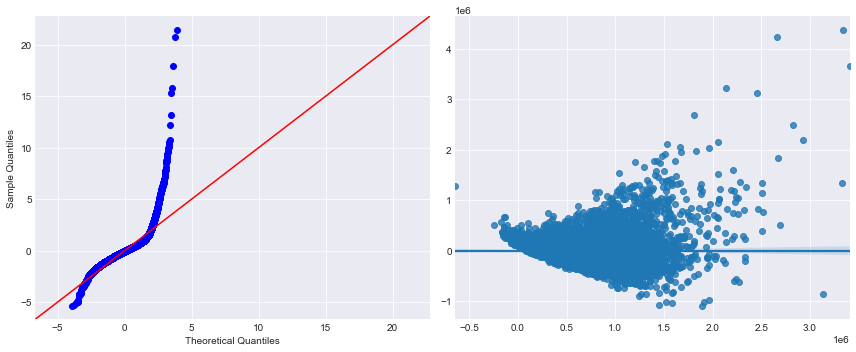

In [32]:
# Fitting the first model from the baseline dataset
model1 = make_model(df)
evaluation(model1, df)

The first model has an .69 R-squared. Not bad but could be improved. QQ Plot shows the residuals are not normally distributed and violated the assumptions of heteroscedasticity.

# Model 2

### OneHotEncoding Categorical Variables

In [33]:
cat_cols = ['zipcode','condition']

Pulling out the predictors identified above as categorical. The other categorical features are already binary or ordinal.

In [34]:
encoder = OneHotEncoder(sparse=False, drop='first')
encoder

OneHotEncoder(drop='first', sparse=False)

In [35]:
data_ohe = encoder.fit_transform(df[cat_cols])
df_ohe = pd.DataFrame(data_ohe,columns=encoder.get_feature_names(cat_cols),
                     index=df.index)
df_ohe

zipcode_98002  zipcode_98003  ...  condition_4  condition_5
id                                        ...                          
7129300520           0.00           0.00  ...         0.00         0.00
6414100192           0.00           0.00  ...         0.00         0.00
5631500400           0.00           0.00  ...         0.00         0.00
2487200875           0.00           0.00  ...         0.00         1.00
1954400510           0.00           0.00  ...         0.00         0.00
...                   ...            ...  ...          ...          ...
263000018            0.00           0.00  ...         0.00         0.00
6600060120           0.00           0.00  ...         0.00         0.00
1523300141           0.00           0.00  ...         0.00         0.00
291310100            0.00           0.00  ...         0.00         0.00
1523300157           0.00           0.00  ...         0.00         0.00

[21597 rows x 73 columns]

In [36]:
df_model2 = pd.concat([df.copy(),df_ohe], axis=1,join='inner')
df_model2.drop(columns=['condition','zipcode'],inplace=True)
df_model2

price  bedrooms  ...  condition_4  condition_5
id                              ...                          
7129300520 221900.00         3  ...         0.00         0.00
6414100192 538000.00         3  ...         0.00         0.00
5631500400 180000.00         2  ...         0.00         0.00
2487200875 604000.00         4  ...         0.00         1.00
1954400510 510000.00         3  ...         0.00         0.00
...              ...       ...  ...          ...          ...
263000018  360000.00         3  ...         0.00         0.00
6600060120 400000.00         4  ...         0.00         0.00
1523300141 402101.00         2  ...         0.00         0.00
291310100  400000.00         3  ...         0.00         0.00
1523300157 325000.00         2  ...         0.00         0.00

[21597 rows x 92 columns]

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                   OLS                   Adj. R-squared:          0.799      
Dependent Variable:      price                 AIC:                     580256.9951
Date:                    2021-11-04 12:32      BIC:                     580983.2033
No. Observations:        21597                 Log-Likelihood:          -2.9004e+05
Df Model:                90                    F-statistic:             952.9      
Df Residuals:            21506                 Prob (F-statistic):      0.00       
R-squared:               0.800                 Scale:                   2.7171e+10 
-----------------------------------------------------------------------------------
                  Coef.       Std.Err.     t     P>|t|      [0.025        0.975]   
-----------------------------------------------------------------------------------
Intercept          -12.6937      3.0846  -4.1152 0.0000      -18.7398       -6.6476
bedrooms        -30634.7015   1574.1831 -19.4607 0.0000   -33720.2173   -27549.1856
bathrooms        27037.0695   2721.3822   9.9351 0.0000    21702.9581    32371.1808
sqft_living        108.0823     14.8649   7.2710 0.0000       78.9460      137.2185
sqft_lot             0.2771      0.0394   7.0275 0.0000        0.1998        0.3543
floors          -43029.5527   3251.7709 -13.2327 0.0000   -49403.2653   -36655.8402
waterfront      851457.4647  14181.4144  60.0404 0.0000   823660.8388   879254.0906
grade            63550.4818   1870.1570  33.9814 0.0000    59884.8351    67216.1285
sqft_above          94.2188     14.8612   6.3399 0.0000       65.0897      123.3478
sqft_basement       64.3772     15.3859   4.1842 0.0000       34.2197       94.5347
yr_built        -13267.5439   3116.1166  -4.2577 0.0000   -19375.3640    -7159.7238
yr_renovated      2649.1114    391.4468   6.7675 0.0000     1881.8466     3416.3763
lat             160775.2945  65069.6262   2.4708 0.0135    33233.9927   288316.5963
long           -152265.8787  46727.9087  -3.2586 0.0011  -243856.0515   -60675.7059
sqft_living15       27.7759      2.9215   9.5075 0.0000       22.0496       33.5021
sqft_lot15          -0.1385      0.0621  -2.2315 0.0257       -0.2602       -0.0168
renovated     -5245969.8264 781288.5930  -6.7145 0.0000 -6777353.5168 -3714586.1359
basement        -32849.3685   4399.4964  -7.4666 0.0000   -41472.7084   -24226.0287
age             -12386.4442   3118.2607  -3.9722 0.0001   -18498.4669    -6274.4214
zipcode_98002    39255.6774  14846.4809   2.6441 0.0082    10155.4717    68355.8831
zipcode_98003   -19398.8109  13273.0430  -1.4615 0.1439   -45414.9613     6617.3394
zipcode_98004   719660.6734  24130.2164  29.8240 0.0000   672363.6565   766957.6904
zipcode_98005   242853.1568  25790.3167   9.4164 0.0000   192302.2199   293404.0937
zipcode_98006   241464.0648  21085.4777  11.4517 0.0000   200134.9619   282793.1678
zipcode_98007   199515.6053  26616.0840   7.4961 0.0000   147346.1031   251685.1075
zipcode_98008   229420.9099  25269.2326   9.0791 0.0000   179891.3367   278950.4832
zipcode_98010   103576.0282  22636.2497   4.5757 0.0000    59207.2969   147944.7595
zipcode_98011    49643.3258  32872.4026   1.5102 0.1310   -14789.0258   114075.6773
zipcode_98014   104667.7570  36108.0701   2.8987 0.0038    33893.2568   175442.2572
zipcode_98019    60501.8499  35612.1058   1.6989 0.0894    -9300.5234   130304.2232
zipcode_98022    69128.8434  19646.3008   3.5187 0.0004    30620.6342   107637.0526
zipcode_98023   -50197.8174  12213.5924  -4.1100 0.0000   -74137.3658   -26258.2689
zipcode_98024   167934.1676  31777.5423   5.2847 0.0000   105647.8238   230220.5115
zipcode_98027   156289.8123  21641.9102   7.2216 0.0000   113870.0604   198709.5642
zipcode_98028    47413.8340  31928.9475   1.4850 0.1376   -15169.2753   109996.9434
zipcode_98029   198964.7664  

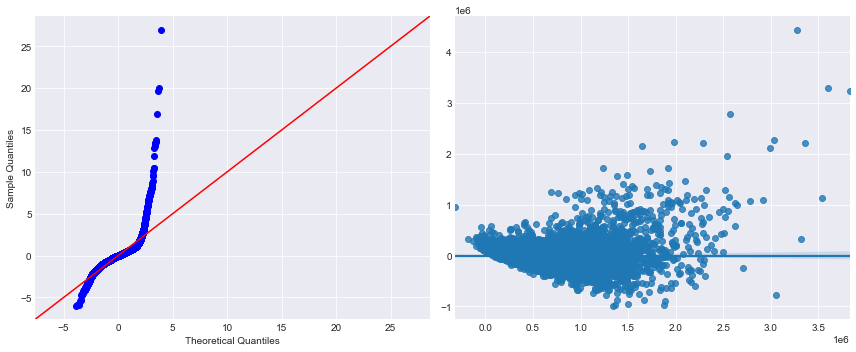

In [37]:
model2 = make_model(df_model2)
evaluation(model2, df_model2)

Breaking out categorical variable improved R-Squared to from .69 to .80. Some of the zipcode categories has large p-values but most do not so they can remain in the model. The distribution of errors and homoscedascity must still be improved. Curiously bedrooms and floors have a negative coefficients. Something to consider while fine tuning the model. 

# Model 3

## Adressing Multicolinearity

In [38]:
## Get the correlation matrix for our model_df (without the target)
corr = df.drop('price',axis=1).corr()
corr.round(2)

bedrooms  bathrooms  sqft_living  ...  renovated  basement   age
bedrooms           1.00       0.51         0.58  ...       0.02      0.16 -0.16
bathrooms          0.51       1.00         0.76  ...       0.05      0.16 -0.51
sqft_living        0.58       0.76         1.00  ...       0.05      0.20 -0.32
sqft_lot           0.03       0.09         0.17  ...       0.01     -0.03 -0.05
floors             0.18       0.50         0.35  ...       0.00     -0.25 -0.49
waterfront        -0.00       0.06         0.10  ...       0.07      0.04  0.02
condition          0.03      -0.13        -0.06  ...      -0.06      0.13  0.36
grade              0.36       0.67         0.76  ...       0.02      0.05 -0.45
sqft_above         0.48       0.69         0.88  ...       0.02     -0.21 -0.42
sqft_basement      0.30       0.28         0.43  ...       0.06      0.82  0.13
yr_built           0.16       0.51         0.32  ...      -0.20     -0.16 -1.00
yr_renovated       0.02       0.05         0.05  ...       1.00      0.04  0.20
zipcode           -0.15      -0.20        -0.20  ...       0.06      0.16  0.35
lat               -0.01       0.02         0.05  ...       0.03      0.14  0.15
long               0.13       0.22         0.24  ...      -0.06     -0.23 -0.41
sqft_living15      0.39       0.57         0.76  ...       0.00      0.04 -0.33
sqft_lot15         0.03       0.09         0.18  ...       0.00     -0.04 -0.07
renovated          0.02       0.05         0.05  ...       1.00      0.04  0.20
basement           0.16       0.16         0.20  ...       0.04      1.00  0.16
age               -0.16      -0.51        -0.32  ...       0.20      0.16  1.00

[20 rows x 20 columns]

In [39]:
abs(corr.round(2)) > 0.75

bedrooms  bathrooms  sqft_living  ...  renovated  basement    age
bedrooms           True      False        False  ...      False     False  False
bathrooms         False       True         True  ...      False     False  False
sqft_living       False       True         True  ...      False     False  False
sqft_lot          False      False        False  ...      False     False  False
floors            False      False        False  ...      False     False  False
waterfront        False      False        False  ...      False     False  False
condition         False      False        False  ...      False     False  False
grade             False      False         True  ...      False     False  False
sqft_above        False      False         True  ...      False     False  False
sqft_basement     False      False        False  ...      False      True  False
yr_built          False      False        False  ...      False     False   True
yr_renovated      False      False        False  ...       True     False  False
zipcode           False      False        False  ...      False     False  False
lat               False      False        False  ...      False     False  False
long              False      False        False  ...      False     False  False
sqft_living15     False      False         True  ...      False     False  False
sqft_lot15        False      False        False  ...      False     False  False
renovated         False      False        False  ...       True     False  False
basement          False      False        False  ...      False      True  False
age               False      False        False  ...      False     False   True

[20 rows x 20 columns]

In [40]:
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
df_corr = corr.abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))

# set index to pairs
df_corr.set_index(['pairs'], inplace = True)

#drop level columns
df_corr.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_corr.columns = ['cc']
df_corr.drop_duplicates(inplace=True)

df_corr[(df_corr.cc>.75) & (df_corr.cc <1)]

cc
pairs                            
(yr_renovated, renovated)    1.00
(sqft_above, sqft_living)    0.88
(sqft_basement, basement)    0.82
(grade, sqft_living)         0.76
(sqft_living15, sqft_living) 0.76
(grade, sqft_above)          0.76
(sqft_living, bathrooms)     0.76

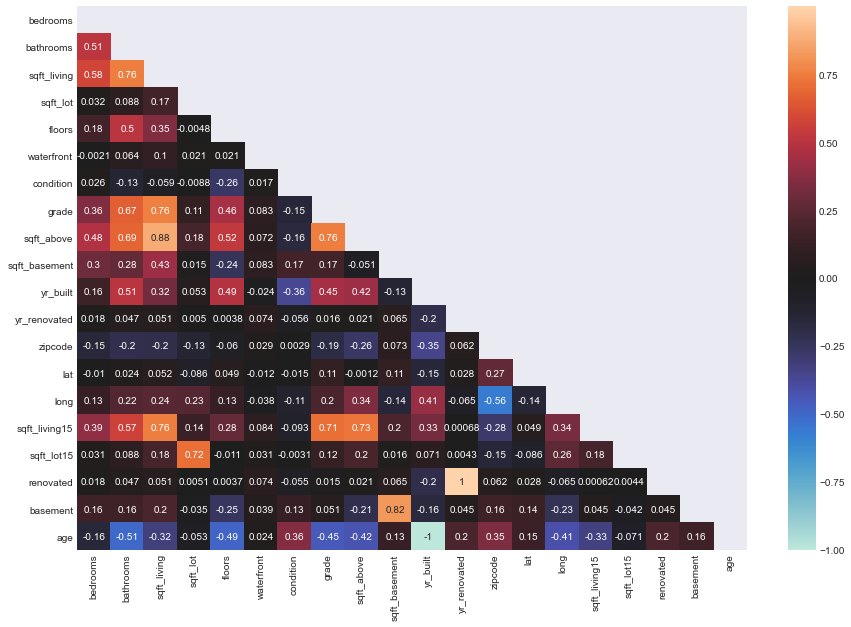

In [41]:
## Plot this as a heatmap

fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(corr,ax=ax, center=0,annot=True,mask=np.triu(np.ones_like(corr, dtype=bool)));


In [42]:
df_trimmed = df.copy()
# Trim for multicolinearty
df_trimmed.drop(columns=['sqft_living','yr_renovated','yr_built','sqft_basement','sqft_lot15'],inplace=True)

<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Ordinary least squares
=============================================================================================
Model:                       OLS                      Adj. R-squared:             0.787      
Dependent Variable:          price                    AIC:                        581450.4938
Date:                        2021-11-04 12:35         BIC:                        582144.7808
No. Observations:            21597                    Log-Likelihood:             -2.9064e+05
Df Model:                    86                       F-statistic:                929.9      
Df Residuals:                21510                    Prob (F-statistic):         0.00       
R-squared:                   0.788                    Scale:                      2.8720e+10 
---------------------------------------------------------------------------------------------
                        Coef.        Std.Err.      t     P>|t|      [0.025         0.975]    
---------------------------------------------------------------------------------------------
Intercept           -26362798.0347 6467151.7865  -4.0764 0.0000 -39038895.9003 -13686700.1690
C(condition)[T.2]       49437.0569   34178.4511   1.4464 0.1481    -17555.2459    116429.3597
C(condition)[T.3]       38910.8335   31733.6525   1.2262 0.2201    -23289.4825    101111.1495
C(condition)[T.4]       64973.7892   31741.3153   2.0470 0.0407      2758.4536    127189.1249
C(condition)[T.5]      110519.4061   31931.7018   3.4611 0.0005     47930.8988    173107.9133
C(zipcode)[T.98002]     38817.1719   15263.2341   2.5432 0.0110      8900.0993     68734.2445
C(zipcode)[T.98003]    -22732.0139   13645.2706  -1.6659 0.0957    -49477.7578      4013.7301
C(zipcode)[T.98004]    725074.8572   24805.5328  29.2304 0.0000    676454.1704    773695.5440
C(zipcode)[T.98005]    239599.0847   26512.7758   9.0371 0.0000    187632.0749    291566.0945
C(zipcode)[T.98006]    251611.6140   21669.6156  11.6113 0.0000    209137.5579    294085.6701
C(zipcode)[T.98007]    196717.5783   27359.3830   7.1901 0.0000    143091.1554    250344.0011
C(zipcode)[T.98008]    229666.0419   25973.8421   8.8422 0.0000    178755.3821    280576.7017
C(zipcode)[T.98010]     96170.0557   23262.8247   4.1341 0.0000     50573.1915    141766.9200
C(zipcode)[T.98011]     47606.0384   33793.2379   1.4087 0.1589    -18631.2179    113843.2947
C(zipcode)[T.98014]    108809.7134   37108.9836   2.9322 0.0034     36073.3492    181546.0776
C(zipcode)[T.98019]     61354.6876   36610.9094   1.6759 0.0938    -10405.4141    133114.7893
C(zipcode)[T.98022]     60900.3753   20195.3444   3.0156 0.0026     21316.0003    100484.7504
C(zipcode)[T.98023]    -57293.7007   12553.1705  -4.5641 0.0000    -81898.8474    -32688.5541
C(zipcode)[T.98024]    157947.2092   32654.2069   4.8370 0.0000     93942.5382    221951.8803
C(zipcode)[T.98027]    154160.8158   22245.9010   6.9299 0.0000    110557.1974    197764.4341
C(zipcode)[T.98028]     52679.7623   32821.4576   1.6050 0.1085    -11652.7324    117012.2571
C(zipcode)[T.98029]    194476.8181   25393.3130   7.6586 0.0000    144704.0385    244249.5977
C(zipcode)[T.98030]     -1943.2510   15000.2417  -0.1295 0.8969    -31344.8389     27458.3370
C(zipcode)[T.98031]      1842.9095   15626.1159   0.1179 0.9061    -28785.4384     32471.2573
C(zipcode)[T.98032]     -2530.6096   18142.2863  -0.1395 0.8891    -38090.8383     33029.6191
C(zipcode)[T.98033]    314849.9146   28158.0156  11.1815 0.0000    259658.1126    370041.7167
C(zipcode)[T.98034]    143305.0095   30186.5932   4.7473 0.0000     84137.0446    202472.9743
C(zipcode)[T.98038]     47134.9937   16843.6414   2.7984 0.0051     14120.2054     80149.7820
C(zipcode)[T.98039]   1247016.6716   33514.3596  37.2084 0.0000   1181326.0374   1312707.3059
C(zipcode)[T.98040]    482086.5559   21938.2300  21.9747 0.0000    439085.9957    525087.1161
C(zipcode)[T.98042]      9533.0780

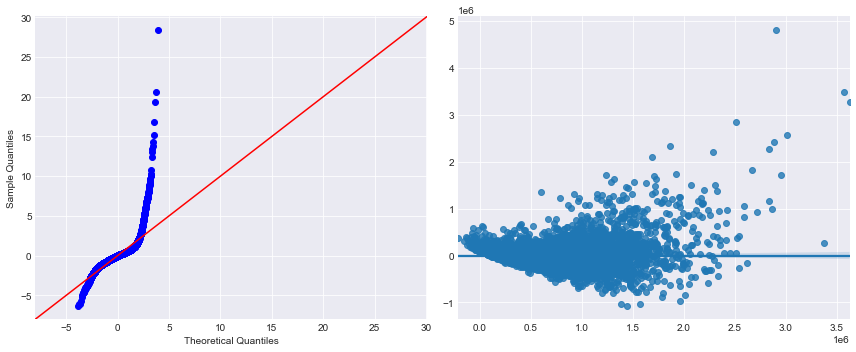

In [44]:
model3 = make_model(df_trimmed,cat_cols=cat_cols)
evaluation(model3,df_trimmed)

The issue of multicollinearity may have been solved but R-Squared value fell from .80 to .78. Small decrease but the residuals are less normally distributed. The condition category has large p-values so will drop as a categorical feature and try as an ordinal feature.

# Model 4

### Removing Outliers

In [54]:
df_scaled = df_trimmed.copy()
df_scaled.drop(columns=['renovated'],inplace=True)

In [55]:
ss = StandardScaler()

In [56]:
scaled_cols = list(df_scaled.columns)
# outlier_cols = ('waterfront','condition','grade','zipcode','renovated','basement')
# filter_cols = [col for col in scaled_cols if col not in outlier_cols]


In [57]:
# Dataframe scaled by z-score
df_z = pd.DataFrame(ss.fit_transform(df_scaled),columns=scaled_cols,index=df_scaled.index)
df_z

price  bedrooms  bathrooms  ...  sqft_living15  basement   age
id                                      ...                               
7129300520  -0.87     -0.40      -1.45  ...          -0.94     -0.79  0.54
6414100192  -0.01     -0.40       0.17  ...          -0.43      1.26  0.68
5631500400  -0.98     -1.48      -1.45  ...           1.07     -0.79  1.29
2487200875   0.17      0.68       1.15  ...          -0.91      1.26  0.20
1954400510  -0.08     -0.40      -0.15  ...          -0.27     -0.79 -0.54
...           ...       ...        ...  ...            ...       ...   ...
263000018   -0.49     -0.40       0.50  ...          -0.67     -0.79 -1.29
6600060120  -0.38      0.68       0.50  ...          -0.23     -0.79 -1.46
1523300141  -0.38     -1.48      -1.78  ...          -1.41     -0.79 -1.29
291310100   -0.38     -0.40       0.50  ...          -0.84     -0.79 -1.12
1523300157  -0.59     -1.48      -1.78  ...          -1.41     -0.79 -1.26

[21597 rows x 15 columns]

In [58]:
df_z.describe()

price  bedrooms  bathrooms  ...  sqft_living15  basement      age
count 21597.00  21597.00   21597.00  ...       21597.00  21597.00 21597.00
mean     -0.00     -0.00       0.00  ...           0.00     -0.00     0.00
std       1.00      1.00       1.00  ...           1.00      1.00     1.00
min      -1.26     -2.56      -2.10  ...          -2.32     -0.79    -1.50
25%      -0.59     -0.40      -0.48  ...          -0.72     -0.79    -0.89
50%      -0.25     -0.40       0.17  ...          -0.21     -0.79    -0.14
75%       0.29      0.68       0.50  ...           0.54      1.26     0.68
max      19.49     31.98       7.65  ...           6.16      1.26     2.42

[8 rows x 15 columns]

Looking at the max  and min values there are clearly some large outliers that are skewing the data and therefore should be removed.

In [59]:
idx_outliers = (df_z[scaled_cols] < -3) | (df_z[scaled_cols] > 3)
idx_outliers

price  bedrooms  bathrooms  ...  sqft_living15  basement    age
id                                      ...                                
7129300520  False     False      False  ...          False     False  False
6414100192  False     False      False  ...          False     False  False
5631500400  False     False      False  ...          False     False  False
2487200875  False     False      False  ...          False     False  False
1954400510  False     False      False  ...          False     False  False
...           ...       ...        ...  ...            ...       ...    ...
263000018   False     False      False  ...          False     False  False
6600060120  False     False      False  ...          False     False  False
1523300141  False     False      False  ...          False     False  False
291310100   False     False      False  ...          False     False  False
1523300157  False     False      False  ...          False     False  False

[21597 rows x 15 columns]

In [60]:
idx_outliers.sum()

price            406
bedrooms          62
bathrooms        187
sqft_lot         346
floors             7
waterfront       146
condition         29
grade            130
sqft_above       253
zipcode            0
lat                0
long             232
sqft_living15    236
basement           0
age                0
dtype: int64

In [61]:
idx_outliers_any = idx_outliers.any(axis=1)

idx_outliers_any.sum()

1423

The dataset has a total of 1423 outliers. Since this is only a small portion of the full dataset we can remove all outlier records from the dataset.

In [63]:
df_no_outliers = df_scaled[~idx_outliers_any].copy()
df_no_outliers

price  bedrooms  bathrooms  ...  sqft_living15  basement  age
id                                         ...                              
7129300520 221900.00         3       1.00  ...           1340         0   66
6414100192 538000.00         3       2.25  ...           1690         1   70
5631500400 180000.00         2       1.00  ...           2720         0   88
2487200875 604000.00         4       3.00  ...           1360         1   56
1954400510 510000.00         3       2.00  ...           1800         0   34
...              ...       ...        ...  ...            ...       ...  ...
263000018  360000.00         3       2.50  ...           1530         0   12
6600060120 400000.00         4       2.50  ...           1830         0    7
1523300141 402101.00         2       0.75  ...           1020         0   12
291310100  400000.00         3       2.50  ...           1410         0   17
1523300157 325000.00         2       0.75  ...           1020         0   13

[20174 rows x 15 columns]

The resulting dataset still contains over 20,000 records.

In [64]:
df_no_outliers.describe()

price  bedrooms  bathrooms  ...  sqft_living15  basement      age
count   20174.00  20174.00   20174.00  ...       20174.00  20174.00 20174.00
mean   496900.73      3.34       2.06  ...        1930.37      0.38    50.52
std    247415.84      0.86       0.70  ...         610.80      0.49    29.33
min     82000.00      1.00       0.50  ...         399.00      0.00     6.00
25%    317000.00      3.00       1.50  ...        1470.00      0.00    25.00
50%    440000.00      3.00       2.25  ...        1810.00      0.00    48.00
75%    618000.00      4.00       2.50  ...        2290.00      1.00    70.00
max   1640000.00      6.00       4.25  ...        4042.00      1.00   121.00

[8 rows x 15 columns]

In [65]:
# All waterfront properties are outliers 
df_no_outliers.drop(columns=['waterfront'],axis=1,inplace=True)

<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Ordinary least squares
=============================================================================================
Model:                       OLS                      Adj. R-squared:             0.819      
Dependent Variable:          price                    AIC:                        523892.0228
Date:                        2021-11-04 12:57         BIC:                        524596.2042
No. Observations:            20174                    Log-Likelihood:             -2.6186e+05
Df Model:                    88                       F-statistic:                1041.      
Df Residuals:                20085                    Prob (F-statistic):         0.00       
R-squared:                   0.820                    Scale:                      1.1058e+10 
---------------------------------------------------------------------------------------------
                        Coef.        Std.Err.      t     P>|t|      [0.025         0.975]    
---------------------------------------------------------------------------------------------
Intercept           -28247902.7563 5241549.0588  -5.3892 0.0000 -38521769.2591 -17974036.2535
C(condition)[T.3]       30126.3432    8693.6335   3.4653 0.0005     13086.1077     47166.5787
C(condition)[T.4]       52273.5051    8729.6001   5.9881 0.0000     35162.7723     69384.2380
C(condition)[T.5]       90231.3151    9023.7689   9.9993 0.0000     72543.9871    107918.6431
C(grade)[T.6]            7053.4299    7703.9636   0.9156 0.3599     -8046.9712     22153.8311
C(grade)[T.7]           29461.7668    7606.6013   3.8732 0.0001     14552.2037     44371.3298
C(grade)[T.8]           77069.8998    7947.0851   9.6979 0.0000     61492.9606     92646.8390
C(grade)[T.9]          171763.3781    8528.4850  20.1400 0.0000    155046.8472    188479.9090
C(grade)[T.10]         256939.8341    9386.0292  27.3747 0.0000    238542.4462    275337.2220
C(grade)[T.11]         362351.2223   12372.6308  29.2865 0.0000    338099.8501    386602.5945
C(zipcode)[T.98002]     24783.0620    9706.8224   2.5532 0.0107      5756.8932     43809.2309
C(zipcode)[T.98003]    -10131.5184    8570.0225  -1.1822 0.2371    -26929.4662      6666.4294
C(zipcode)[T.98004]    593424.7101   16812.1472  35.2974 0.0000    560471.5212    626377.8989
C(zipcode)[T.98005]    312970.3720   17749.3888  17.6327 0.0000    278180.1126    347760.6314
C(zipcode)[T.98006]    285342.8262   14928.2424  19.1143 0.0000    256082.2453    314603.4070
C(zipcode)[T.98007]    251665.9700   18426.6555  13.6577 0.0000    215548.2123    287783.7276
C(zipcode)[T.98008]    265064.2361   17916.4697  14.7944 0.0000    229946.4845    300181.9878
C(zipcode)[T.98010]    129998.0561   16993.9522   7.6497 0.0000     96688.5145    163307.5977
C(zipcode)[T.98011]    119182.2794   22449.1829   5.3090 0.0000     75180.0379    163184.5210
C(zipcode)[T.98014]    163503.1194   26663.0797   6.1322 0.0000    111241.2942    215764.9447
C(zipcode)[T.98019]    130580.2546   26204.4900   4.9831 0.0000     79217.3026    181943.2065
C(zipcode)[T.98022]     70371.5082   14945.1936   4.7086 0.0000     41077.7017     99665.3146
C(zipcode)[T.98023]    -46459.4826    8285.3406  -5.6074 0.0000    -62699.4305    -30219.5347
C(zipcode)[T.98024]    188778.2039   25365.7056   7.4423 0.0000    139059.3383    238497.0694
C(zipcode)[T.98027]    208650.3310   16206.2883  12.8747 0.0000    176884.6754    240415.9866
C(zipcode)[T.98028]    112939.6625   21628.0029   5.2219 0.0000     70547.0010    155332.3240
C(zipcode)[T.98029]    254560.4183   18644.4651  13.6534 0.0000    218015.7360    291105.1006
C(zipcode)[T.98030]     15160.6069    9797.8099   1.5473 0.1218     -4043.9050     34365.1187
C(zipcode)[T.98031]     22652.4510   10278.3668   2.2039 0.0275      2506.0082     42798.8937
C(zipcode)[T.98032]     -5033.4100   11344.7553  -0.4437 0.6573    -27270.0618     17203.2418
C(zipcode)[T.98033]    340930.0896

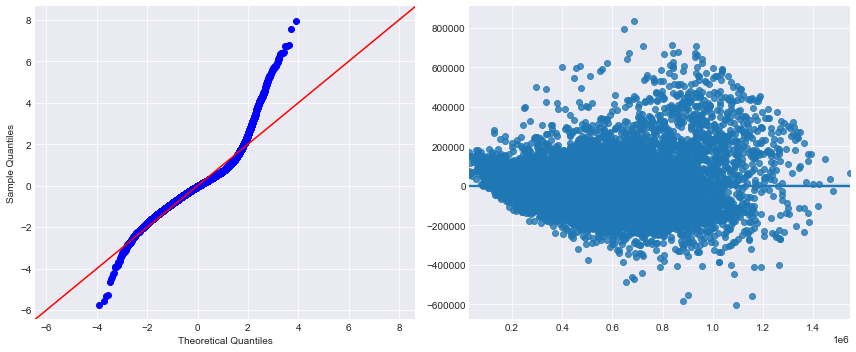

In [92]:
# Try the model again with outliers removed
model4 = make_model(df_no_outliers,cat_cols=['zipcode','grade','condition','basement'])
evaluation(model4, df_no_outliers)

R-squared improves to .82. The homoscedasticity assumptions and distribution of residuals is looking much more normally distributed than before, can still be improved. 

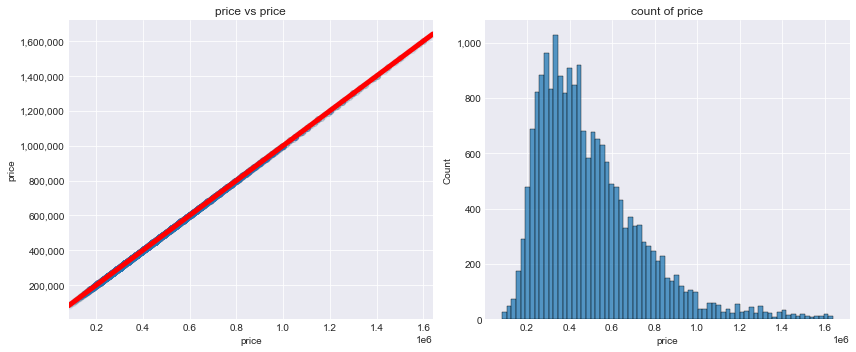

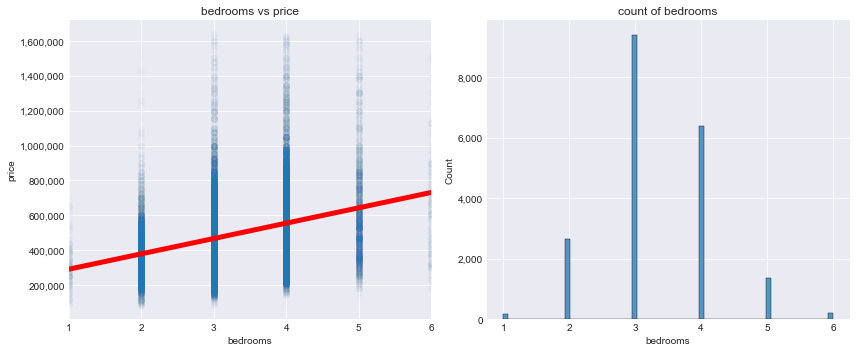

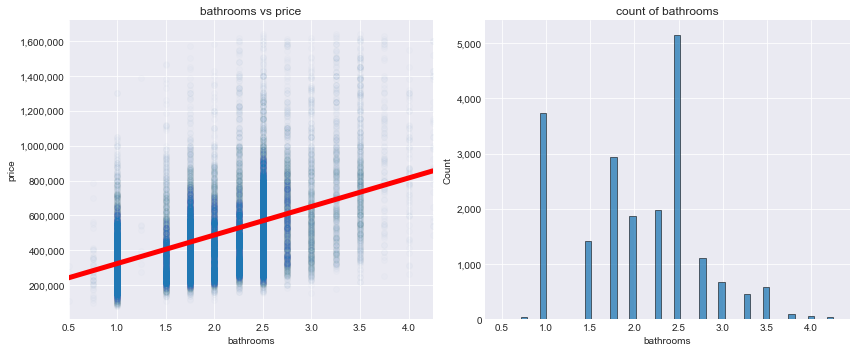

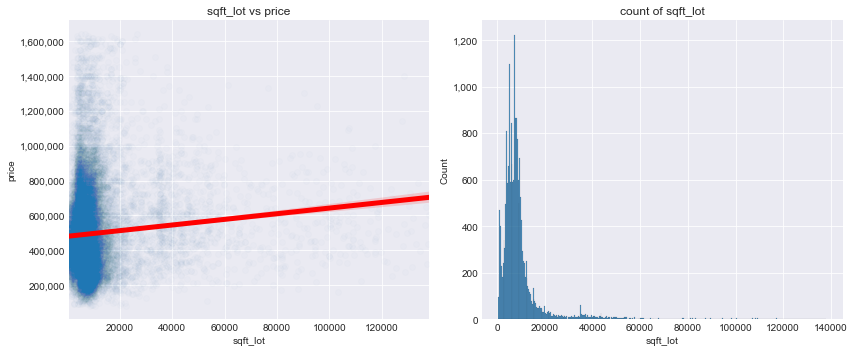

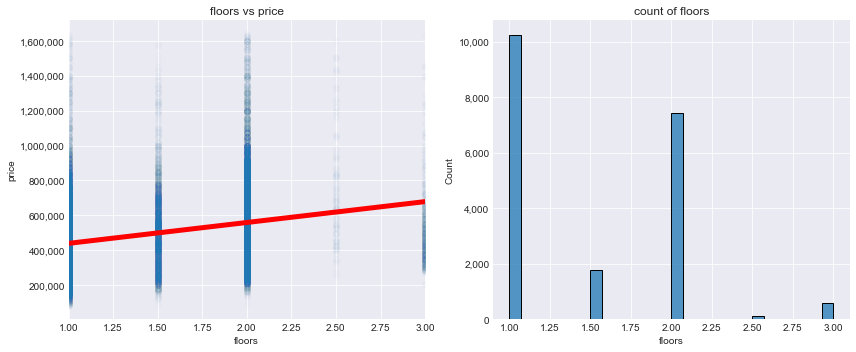

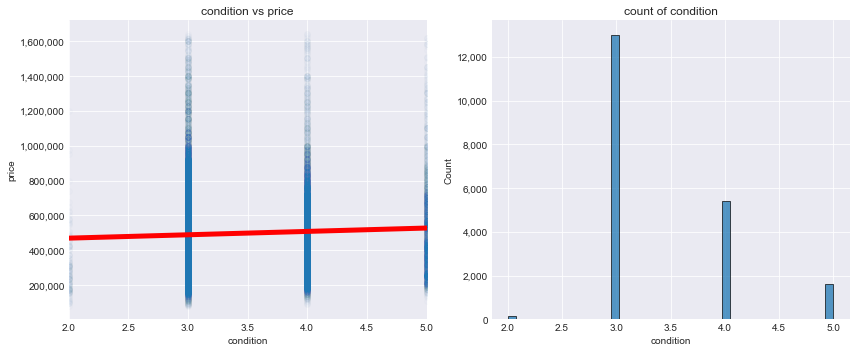

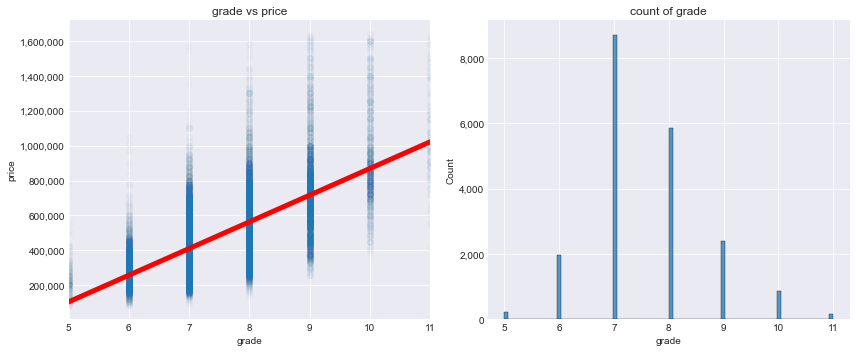

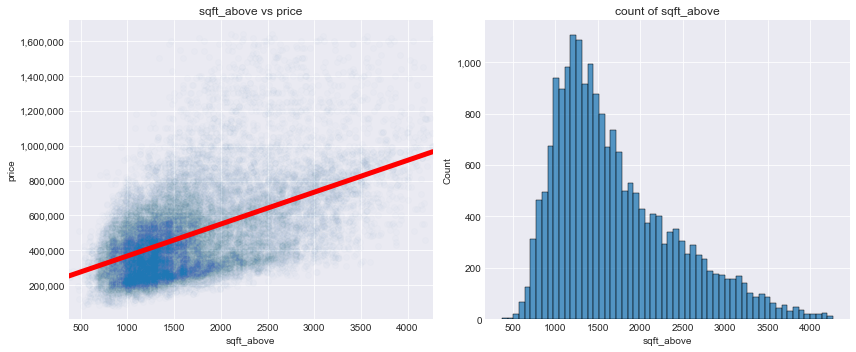

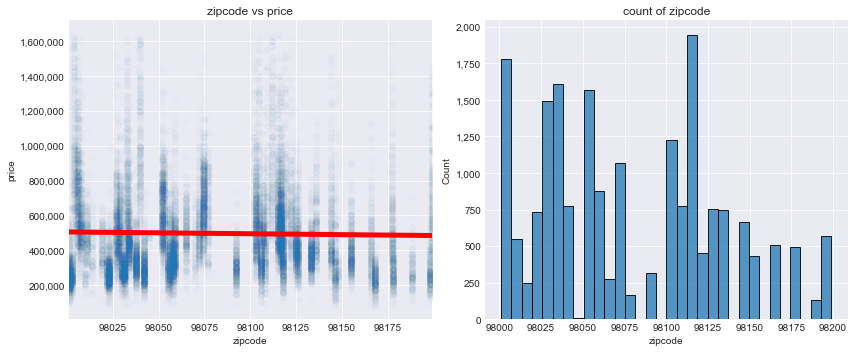

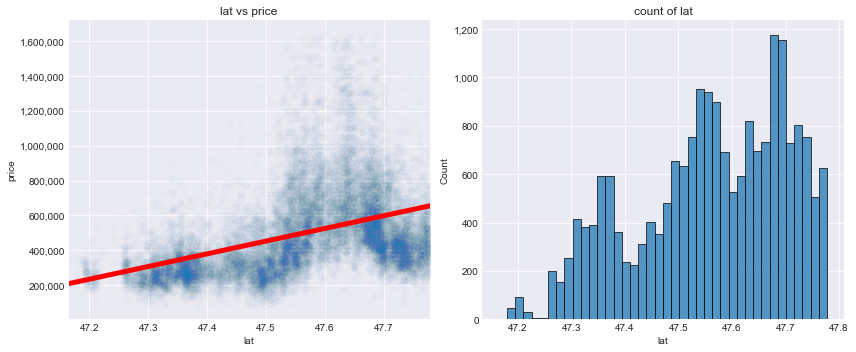

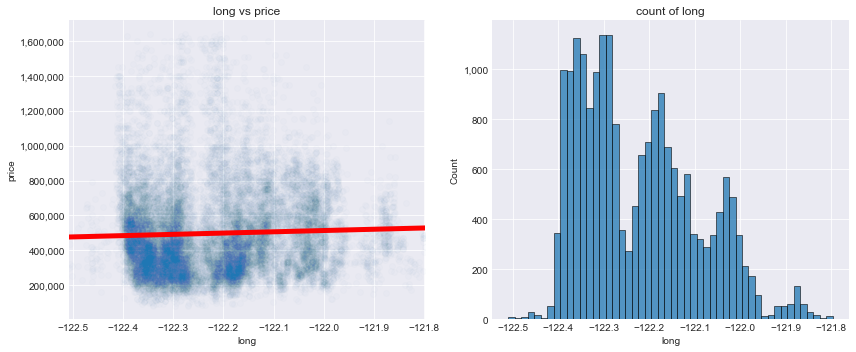

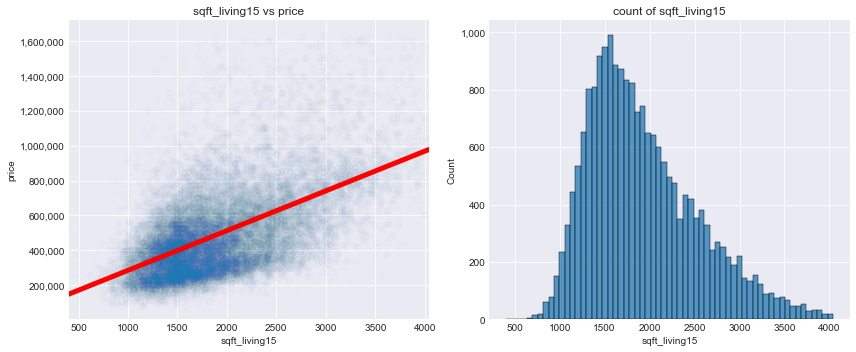

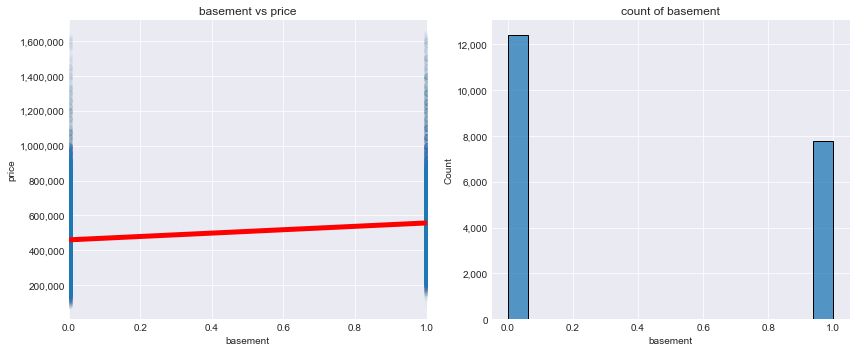

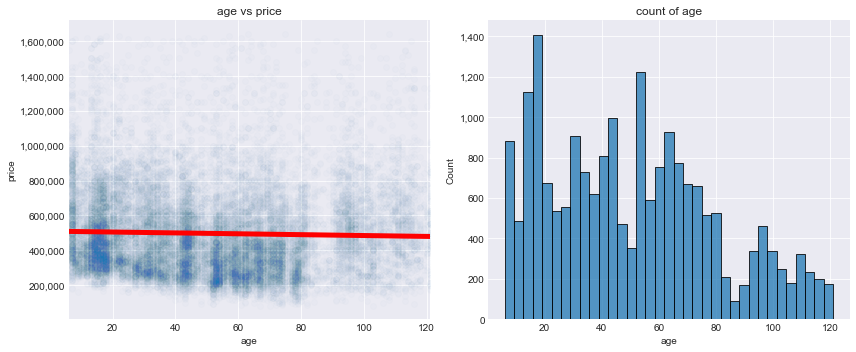

In [67]:
# Checking for Linearity with outliers removed
refined_cols = list(df_no_outliers.columns)

for col in refined_cols:
    plots(df_no_outliers, col, y='price')

Assumptions of linearity are much more clearer now and the continuous variables are more normally distributed, but still slightly skewed.

### Checking for multicollinearity again

In [73]:
## Get the correlation matrix for our model_df (without the target)
corr = df_no_outliers.drop('price',axis=1).corr()
corr.round(2)

bedrooms  bathrooms  sqft_lot  ...  sqft_living15  basement   age
bedrooms           1.00       0.50      0.09  ...           0.40      0.15 -0.16
bathrooms          0.50       1.00      0.06  ...           0.53      0.15 -0.54
sqft_lot           0.09       0.06      1.00  ...           0.26     -0.02 -0.03
floors             0.16       0.50     -0.09  ...           0.26     -0.27 -0.50
condition          0.03      -0.14      0.04  ...          -0.10      0.13  0.37
grade              0.34       0.62      0.13  ...           0.68      0.03 -0.46
sqft_above         0.48       0.63      0.21  ...           0.71     -0.26 -0.45
zipcode           -0.16      -0.21     -0.18  ...          -0.29      0.16  0.34
lat               -0.03       0.00     -0.08  ...           0.03      0.13  0.16
long               0.17       0.26      0.28  ...           0.39     -0.24 -0.43
sqft_living15      0.40       0.53      0.26  ...           1.00      0.03 -0.34
basement           0.15       0.15     -0.02  ...           0.03      1.00  0.17
age               -0.16      -0.54     -0.03  ...          -0.34      0.17  1.00

[13 rows x 13 columns]

In [74]:
abs(corr.round(2)) > 0.75

bedrooms  bathrooms  sqft_lot  ...  sqft_living15  basement    age
bedrooms           True      False     False  ...          False     False  False
bathrooms         False       True     False  ...          False     False  False
sqft_lot          False      False      True  ...          False     False  False
floors            False      False     False  ...          False     False  False
condition         False      False     False  ...          False     False  False
grade             False      False     False  ...          False     False  False
sqft_above        False      False     False  ...          False     False  False
zipcode           False      False     False  ...          False     False  False
lat               False      False     False  ...          False     False  False
long              False      False     False  ...          False     False  False
sqft_living15     False      False     False  ...           True     False  False
basement          False      False     False  ...          False      True  False
age               False      False     False  ...          False     False   True

[13 rows x 13 columns]

In [75]:
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
df_corr = corr.abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))

# set index to pairs
df_corr.set_index(['pairs'], inplace = True)

#drop level columns
df_corr.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_corr.columns = ['cc']
df_corr.drop_duplicates(inplace=True)

df_corr[(df_corr.cc>.75) & (df_corr.cc <1)]

Empty DataFrame
Columns: [cc]
Index: []

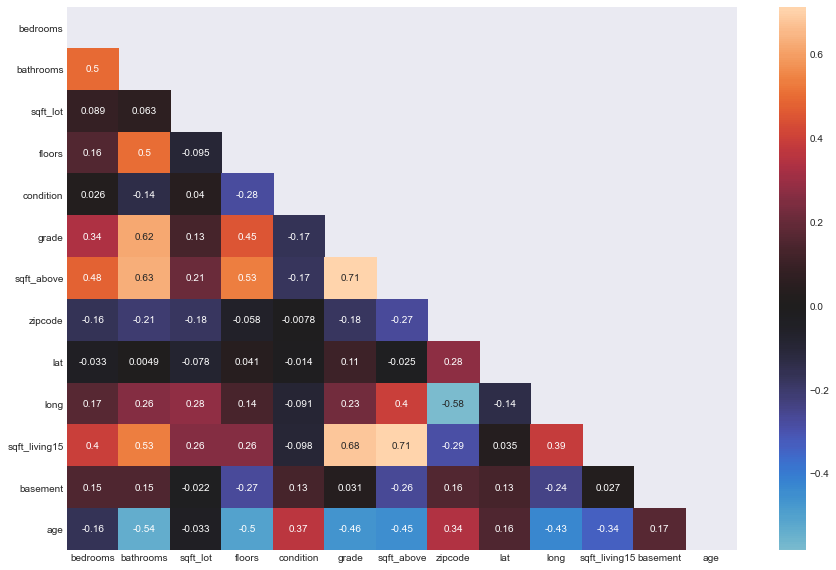

In [76]:
fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(corr,ax=ax, center=0,annot=True,mask=np.triu(np.ones_like(corr, dtype=bool)));

Looks much better now with outliers and columns trimmed.

### Variance Inflation Factor

In [77]:
no_outlier_cols = list(df_no_outliers)
no_outlier_cols.remove('price')
no_outlier_cols.remove('condition')
no_outlier_cols.remove('grade')
no_outlier_cols.remove('zipcode')
X = df_no_outliers[no_outlier_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(no_outlier_cols, vif))

[('bedrooms', 25.28541109934226),
 ('bathrooms', 27.518417279134713),
 ('sqft_lot', 1.8499121447213551),
 ('floors', 16.542890722160347),
 ('sqft_above', 28.03668664381894),
 ('lat', 118211.82978832249),
 ('long', 117587.1885724088),
 ('sqft_living15', 26.861119382963764),
 ('basement', 2.6475073164886216),
 ('age', 6.612972935123147)]

All of the features besides sqft_lot, basement and age have large VIFs.

In [78]:
price_corrs2 = df_no_outliers.corr()['price'].map(abs).sort_values(ascending=False)
price_corrs2

price           1.00
grade           0.65
sqft_living15   0.56
sqft_above      0.52
bathrooms       0.46
lat             0.41
bedrooms        0.31
floors          0.26
basement        0.19
sqft_lot        0.09
condition       0.05
long            0.04
age             0.03
zipcode         0.02
Name: price, dtype: float64

Now it appears the top 3 features most correlated with price are grade, sqft, and bathrooms. 

# Model 5

## Feature Engineering

In [101]:
# bathrooms per sqft and bedroom
df_bath_m5 = df_no_outliers.copy()
df_bath_m5['sqft_per_bath'] = df_bath_m5['sqft_above'] / df_bath_m5['bathrooms']
df_bath_m5

price  bedrooms  bathrooms  ...  basement  age  sqft_per_bath
id                                         ...                              
7129300520 221900.00         3       1.00  ...         0   66        1180.00
6414100192 538000.00         3       2.25  ...         1   70         964.44
5631500400 180000.00         2       1.00  ...         0   88         770.00
2487200875 604000.00         4       3.00  ...         1   56         350.00
1954400510 510000.00         3       2.00  ...         0   34         840.00
...              ...       ...        ...  ...       ...  ...            ...
263000018  360000.00         3       2.50  ...         0   12         612.00
6600060120 400000.00         4       2.50  ...         0    7         924.00
1523300141 402101.00         2       0.75  ...         0   12        1360.00
291310100  400000.00         3       2.50  ...         0   17         640.00
1523300157 325000.00         2       0.75  ...         0   13        1360.00

[20174 rows x 15 columns]

<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Ordinary least squares
=============================================================================================
Model:                       OLS                      Adj. R-squared:             0.820      
Dependent Variable:          price                    AIC:                        523833.5860
Date:                        2021-11-04 13:08         BIC:                        524545.6794
No. Observations:            20174                    Log-Likelihood:             -2.6183e+05
Df Model:                    89                       F-statistic:                1033.      
Df Residuals:                20084                    Prob (F-statistic):         0.00       
R-squared:                   0.821                    Scale:                      1.1025e+10 
---------------------------------------------------------------------------------------------
                        Coef.        Std.Err.      t     P>|t|      [0.025         0.975]    
---------------------------------------------------------------------------------------------
Intercept           -27964463.8238 5233961.3316  -5.3429 0.0000 -38223457.7891 -17705469.8584
C(condition)[T.3]       30480.0521    8680.9569   3.5111 0.0004     13464.6639     47495.4404
C(condition)[T.4]       52763.6972    8716.9796   6.0530 0.0000     35677.7014     69849.6930
C(condition)[T.5]       91082.0123    9011.1532  10.1077 0.0000     73419.4122    108744.6124
C(grade)[T.6]            4550.7704    7699.3770   0.5911 0.5545    -10540.6408     19642.1816
C(grade)[T.7]           25599.9700    7611.6801   3.3632 0.0008     10680.4521     40519.4880
C(grade)[T.8]           72835.3933    7954.1154   9.1569 0.0000     57244.6741     88426.1125
C(grade)[T.9]          168368.1527    8527.1567  19.7449 0.0000    151654.2255    185082.0799
C(grade)[T.10]         254193.1582    9378.8907  27.1027 0.0000    235809.7622    272576.5541
C(grade)[T.11]         361019.4835   12355.6105  29.2191 0.0000    336801.4724    385237.4946
C(zipcode)[T.98002]     24322.3409    9692.7165   2.5093 0.0121      5323.8207     43320.8612
C(zipcode)[T.98003]     -9990.7149    8557.4275  -1.1675 0.2430    -26763.9754      6782.5455
C(zipcode)[T.98004]    592009.1702   16788.3916  35.2630 0.0000    559102.5442    624915.7962
C(zipcode)[T.98005]    311581.6815   17724.1661  17.5795 0.0000    276840.8605    346322.5024
C(zipcode)[T.98006]    284311.2664   14906.8617  19.0725 0.0000    255092.5934    313529.9393
C(zipcode)[T.98007]    251200.9712   18399.6306  13.6525 0.0000    215136.1845    287265.7580
C(zipcode)[T.98008]    264316.3952   17890.3577  14.7742 0.0000    229249.8252    299382.9652
C(zipcode)[T.98010]    129104.8887   16969.3287   7.6081 0.0000     95843.6111    162366.1664
C(zipcode)[T.98011]    118433.1277   22416.3474   5.2833 0.0000     74495.2462    162371.0092
C(zipcode)[T.98014]    161387.9491   26625.2283   6.0615 0.0000    109200.3154    213575.5828
C(zipcode)[T.98019]    128727.5431   26167.0079   4.9195 0.0000     77438.0591    180017.0271
C(zipcode)[T.98022]     69554.1530   14923.5671   4.6607 0.0000     40302.7362     98805.5697
C(zipcode)[T.98023]    -45392.8252    8274.2864  -5.4860 0.0000    -61611.1060    -29174.5445
C(zipcode)[T.98024]    186532.1624   25330.0221   7.3641 0.0000    136883.2392    236181.0856
C(zipcode)[T.98027]    206653.6823   16184.4781  12.7686 0.0000    174930.7763    238376.5883
C(zipcode)[T.98028]    111508.9738   21596.9549   5.1632 0.0000     69177.1689    153840.7787
C(zipcode)[T.98029]    253380.1574   18617.6429  13.6097 0.0000    216888.0486    289872.2663
C(zipcode)[T.98030]     15104.3770    9783.3911   1.5439 0.1226     -4071.8728     34280.6267
C(zipcode)[T.98031]     22998.6121   10263.3348   2.2409 0.0250      2881.6331     43115.5910
C(zipcode)[T.98032]     -5227.9381   11328.0845  -0.4615 0.6444    -27431.9139     16976.0377
C(zipcode)[T.98033]    339608.1044

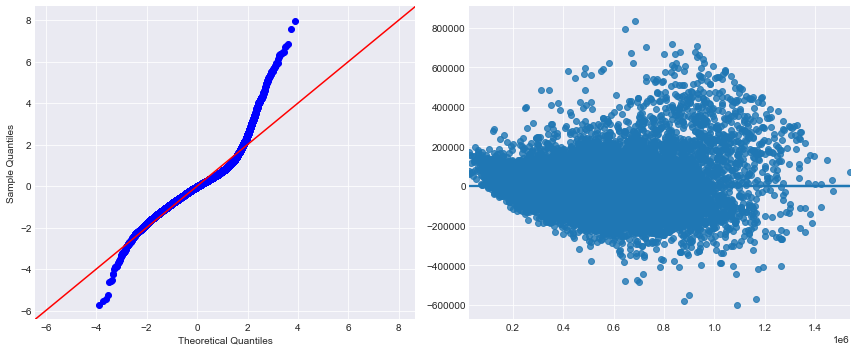

In [104]:
model5 = make_model(df_bath_m5,cat_cols=['zipcode','grade','condition','basement'])
evaluation(model5,df_bath_m5)

No significant changes.

# iNTERPRET

In [106]:
coeffs = model5.params.sort_values().to_frame('coeffs')
coeffs['abs'] = coeffs['coeffs'].abs()
coeffs.sort_values('abs', ascending=False, inplace=True)

In [107]:
coeffs[~coeffs.index.str.startswith('C(zipcode)')]

coeffs         abs
Intercept         -27964463.82 27964463.82
C(grade)[T.11]       361019.48   361019.48
C(grade)[T.10]       254193.16   254193.16
long                -203291.85   203291.85
C(grade)[T.9]        168368.15   168368.15
C(condition)[T.5]     91082.01    91082.01
C(grade)[T.8]         72835.39    72835.39
bathrooms             61346.07    61346.07
lat                   61050.51    61050.51
C(condition)[T.4]     52763.70    52763.70
C(basement)[T.1]      50925.35    50925.35
C(condition)[T.3]     30480.05    30480.05
floors               -28613.48    28613.48
C(grade)[T.7]         25599.97    25599.97
C(grade)[T.6]          4550.77     4550.77
age                     734.06      734.06
bedrooms                205.74      205.74
sqft_above               83.19       83.19
sqft_per_bath            59.41       59.41
sqft_living15            45.29       45.29
sqft_lot                  0.60        0.60

The following features together explain 82% of the variation in house sale price:

* Number of bathrooms
* Living space (sqft) above ground
* Grade
* Condition
* Size of houses in the neighborhood
* Age of house
* Basement
* Zipcode
* Location (Latitude and Longitude)

All the numerical features (aside form location) have a positive relationship with the price of the home. We can interpret this as for every unit of increase, the dependant variable (price) will increase by the predicting variables coefficient.

It is critical to understand that location has a great affect on price. This can best be understood by the difference in coefficients in zipcodes. Some zipcodes can greatly increase price while others may have a negative affect on a home's price.


## Findings Visualized

### Square Footage Above Ground

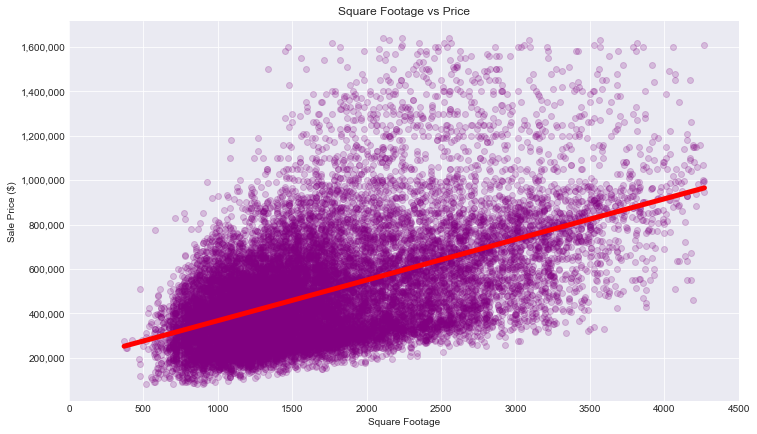

In [230]:
fig, ax = plt.subplots(figsize=(12,7))
sns.regplot(x='sqft_above', y='price', data=df_no_outliers,line_kws={'color':'red','lw':5},scatter_kws={'color':'purple','alpha':.2})
ax.set(title= 'Square Footage vs Price', xlabel= 'Square Footage', ylabel='Sale Price ($)')
ax.xaxis.set_ticks(range(0,5000,500))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

The scatter plot above displays the positive relationship between above ground square footage and sale price. As the square footage of a home increases, so does its price.

### Basements

In [109]:
df_basement = df_no_outliers.loc[:,['price','basement']]
df_basement_price = df_basement.groupby('basement')['price'].mean()

In [110]:
df_basement_price = df_basement_price.to_frame().reset_index()

In [111]:
df_basement_price

basement     price
0         0 459560.88
1         1 556647.39

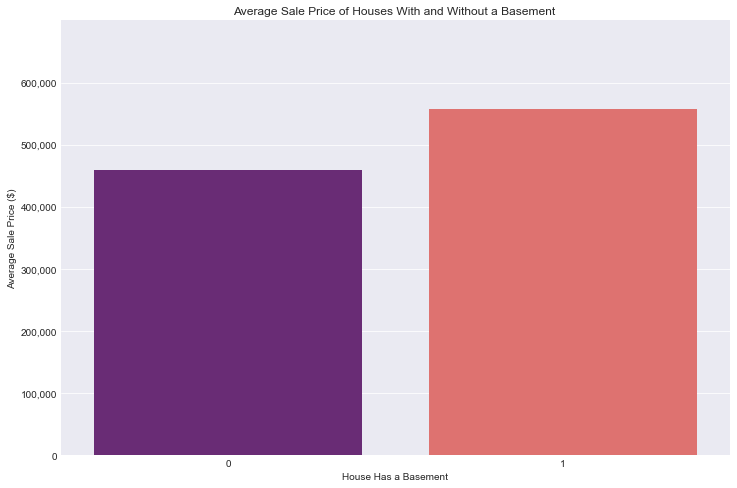

In [121]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data =df_basement_price, x='basement', y= 'price',palette='magma')
ax.set_xlabel('House Has a Basement')
ax.set_ylabel('Average Sale Price ($)')
ax.set_title('Average Sale Price of Houses With and Without a Basement ')
ax.set_ylim(0,700000)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_yticks(range(0,700000,100000));

Houses with a basement on average have a higher sale price (\\$556,647) compared to those without (\\$459,560).

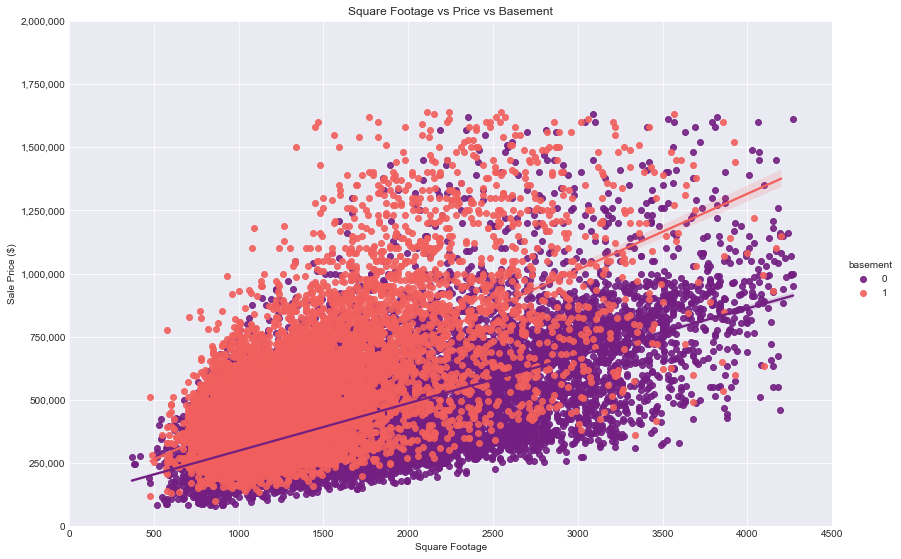

In [214]:
sns.lmplot(x='sqft_above', y='price', data=df_model6, hue='basement', 
           aspect=2, scatter_kws=dict(alpha=0.9), palette="magma")
ax = plt.gca()
ax.set_xlabel('Square Footage')
ax.set_ylabel('Sale Price ($)')
ax.set_title("Square Footage vs Price vs Basement")
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.xaxis.set_ticks(range(0,5000,500))
ax.set_ylim(0, 2000000)
plt.gcf().set_size_inches(12,8);

In the plot above it is evident that houses with a similar above ground square footage but have a basement tend to have a higher sale price compared to similarly sized homes without a basement.

### Grades

In [172]:
df_no_outliers['grade'].value_counts()

7     8714
8     5858
9     2393
6     1977
10     862
5      212
11     158
Name: grade, dtype: int64

In [173]:
df_grade = df_no_outliers.loc[:,['price','grade']]
df_grade

price  grade
id                         
7129300520 221900.00      7
6414100192 538000.00      7
5631500400 180000.00      6
2487200875 604000.00      7
1954400510 510000.00      8
...              ...    ...
263000018  360000.00      8
6600060120 400000.00      8
1523300141 402101.00      7
291310100  400000.00      8
1523300157 325000.00      7

[20174 rows x 2 columns]

In [174]:
mean_price_per_grade = df_grade.groupby('grade')['price'].mean().reset_index()
mean_price_per_grade

grade      price
0      5  242883.33
1      6  299883.79
2      7  401311.94
3      8  536465.48
4      9  741211.06
5     10  922544.18
6     11 1085542.78

The average sale prices by grade show that it is very clearly evident that higher grade leads to a higher sale price.

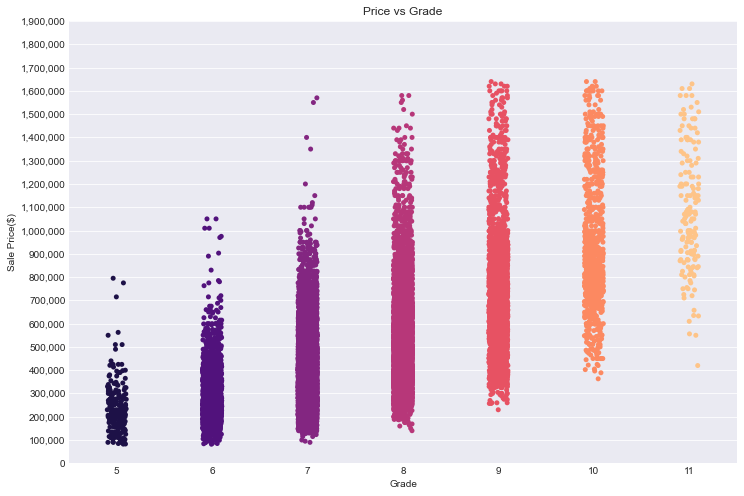

In [191]:
sns.catplot(data = df_grade_sqft, x='grade', y='price', aspect=1.5,palette='magma')
ax = plt.gca()
fig = plt.gcf()
ax.set_yticks(range(0,2000000,100000))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel('Sale Price($)')
fig.set_size_inches(10, 7)
ax.set_xlabel('Grade')
ax.set_title('Price vs Grade');

In [155]:
df_grade_sqft = pd.concat([df_grade, pd.DataFrame(df_no_outliers['sqft_above'])], axis=1)
df_grade_sqft

price  grade  sqft_above
id                                     
7129300520 221900.00      7        1180
6414100192 538000.00      7        2170
5631500400 180000.00      6         770
2487200875 604000.00      7        1050
1954400510 510000.00      8        1680
...              ...    ...         ...
263000018  360000.00      8        1530
6600060120 400000.00      8        2310
1523300141 402101.00      7        1020
291310100  400000.00      8        1600
1523300157 325000.00      7        1020

[20174 rows x 3 columns]

Plotting grade by category displays the relationship between a home's grade and its sale price. Although there is an overlap which can be attributed to other features such as size and location, it is clearly evident that as grade increase price will trend upwards. The biggest increase can be seen in a jump from grade 7 (average grade) to grade 8 (just above average grade).

### Bathrooms

In [176]:
df_bath = df_no_outliers.loc[:,['price','bathrooms']]
df_bath

price  bathrooms
id                             
7129300520 221900.00       1.00
6414100192 538000.00       2.25
5631500400 180000.00       1.00
2487200875 604000.00       3.00
1954400510 510000.00       2.00
...              ...        ...
263000018  360000.00       2.50
6600060120 400000.00       2.50
1523300141 402101.00       0.75
291310100  400000.00       2.50
1523300157 325000.00       0.75

[20174 rows x 2 columns]

In [177]:
df_bath['bathrooms'].value_counts()

2.50    5154
1.00    3741
1.75    2932
2.25    1974
2.00    1862
1.50    1412
2.75    1107
3.00     678
3.50     591
3.25     462
3.75     101
4.00      67
0.75      47
4.25      34
1.25       8
0.50       4
Name: bathrooms, dtype: int64

In [182]:
df_bath_sqft = pd.concat([df_bath, pd.DataFrame(df_no_outliers['sqft_above'])], axis=1)
df_bath_sqft

price  bathrooms  sqft_above
id                                         
7129300520 221900.00       1.00        1180
6414100192 538000.00       2.25        2170
5631500400 180000.00       1.00         770
2487200875 604000.00       3.00        1050
1954400510 510000.00       2.00        1680
...              ...        ...         ...
263000018  360000.00       2.50        1530
6600060120 400000.00       2.50        2310
1523300141 402101.00       0.75        1020
291310100  400000.00       2.50        1600
1523300157 325000.00       0.75        1020

[20174 rows x 3 columns]

In [183]:
df_bath_sqft['full_baths'] = round(df_bath['bathrooms'],0)
df_bath_sqft = df_bath_sqft[df_bath_sqft['full_baths'] > 0]
df_bath_sqft

price  bathrooms  sqft_above  full_baths
id                                                     
7129300520 221900.00       1.00        1180        1.00
6414100192 538000.00       2.25        2170        2.00
5631500400 180000.00       1.00         770        1.00
2487200875 604000.00       3.00        1050        3.00
1954400510 510000.00       2.00        1680        2.00
...              ...        ...         ...         ...
263000018  360000.00       2.50        1530        2.00
6600060120 400000.00       2.50        2310        2.00
1523300141 402101.00       0.75        1020        1.00
291310100  400000.00       2.50        1600        2.00
1523300157 325000.00       0.75        1020        1.00

[20170 rows x 4 columns]

In [184]:
mean_price_per_bath = df_bath_sqft.groupby('full_baths')['price'].mean().reset_index()
mean_price_per_bath

full_baths     price
0        1.00 348174.80
1        2.00 490042.26
2        3.00 667363.12
3        4.00 842453.93

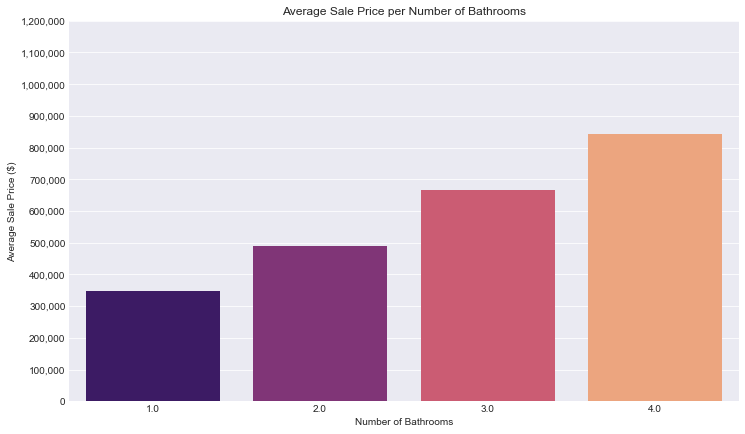

In [187]:
fig, ax = plt.subplots(figsize=(12,7))
sns.barplot(data = mean_price_per_bath, x='full_baths', y= 'price',palette='magma')
ax.set_xlabel('Number of Bathrooms')
ax.set_ylabel('Average Sale Price ($)')
ax.set_title('Average Sale Price per Number of Bathrooms')
ax.set_ylim(0,1200000)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')));
ax.set_yticks(range(0,1300000,100000));

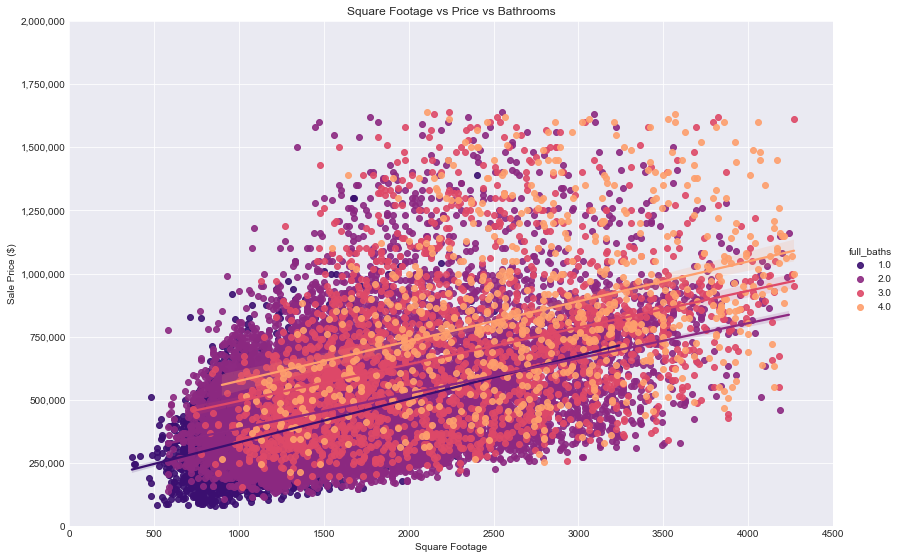

In [215]:
sns.lmplot(x='sqft_above', y='price', data=df_bath_sqft, hue='full_baths', 
           aspect=2, scatter_kws=dict(alpha=0.9), palette="magma")
ax = plt.gca()
ax.set_xlabel('Square Footage')
ax.set_ylabel('Sale Price ($)')
ax.set_title("Square Footage vs Price vs Bathrooms")
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylim(0, 2000000)
ax.xaxis.set_ticks(range(0,5000,500))
plt.gcf().set_size_inches(12,8);

# CONCLUSIONS & RECOMMENDATIONS

Even though not all features of a home are controllable by the homeowner it is important that they are included in the model. This allows the model to reach its largest R-squared value, which can in turn explain the variance in the dependent variable that the independent variables explain collectively. From there we can take the largest coefficients of the features that can be changed (ie bedrooms, bathrooms, square footage, condition, etc.).

The results of the best performing model suggests that the three most salient renovations King County homeowners can do to increase the resale value of their homes are:

* Increasing grade
* Adding a bathroom
* Adding a basement


It's also worth noting increasing the square footage above ground can increase a home's value \\$116 - \\$105 per square foot.


#### Limitations & Next Steps

Given more time and information about what the homeowner's renovation budget would be, we would have wanted to analyze whether these top 3 parameters would truly be the most effective in bringing a net value increase since a renovation such as adding a basement to a home would be very costly and may not end up returning a net value increase. Additionally, the construction costs in the state of Washington may be higher than other states due to factors such as permitting, material costs, logistical challenges etc. which may effect the net value increase as well. Furthermore, having information about whether the homeowner is thinking about living in the renovated house or renting it out would allow us to fine tune our analysis and bring more valuable insight.


#### Further Analysis
Multiple linear regression is a highly interpretable model so it serves as a great choice for problems such as predicting housing prices and determining which features affect price.

With more time and resource allocated to this project, the model could be improved by including renovation project budgets and job costs to get an accurate net value increase. 

The dataset also does not include any information about how the home was marketed and or sold which could have had a significant impact in the sale price even though it is not a feature of the home.

And lastly, this model does not take into account any code or zoning regulations before determining which features should be renovated and some suggestions may not be possible, legal or is cost prohibitive. 

# APPENDIX

## Recursive Feature Elimination

In [ ]:
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=3)

In [ ]:
df_scaled1 = df.copy()
df_scaled1

In [ ]:
ss = StandardScaler()

In [ ]:
df_z = pd.DataFrame(ss.fit_transform(df_scaled1),columns=df_cols)
df_z

In [ ]:
df_refined = df_z[(df_z[df_cols] > -3) & (df_z[df_cols] < 3)]
    
df_refined

In [ ]:
df_refined.isna().sum()

In [ ]:
df_refined2 = df_refined.dropna(axis=0)
df_refined2

In [ ]:
df_refined3 = pd.DataFrame(ss.inverse_transform(df_refined2),columns=df_cols)
df_refined3.describe()

In [ ]:
df_refined3.head(30)

In [ ]:
# ss = StandardScaler()
# ss.fit(df.drop('price', axis=1))

# df_scaled = pd.DataFrame(ss.transform(df.drop('price',axis=1)))

In [ ]:
select.fit(X=df_scaled,y=df['price'])

In [ ]:
select.support_

In [ ]:
df_scaled.columns[select.support_]

In [ ]:
select.ranking_

In [ ]:
df.head()

In [ ]:
# formula = 'price ~ grade + bathrooms + sqft_living'
# model = smf.ols(formula,df_norm).fit()
# model.summary2()

## Feature Engineering

In [ ]:
model2 = make_model(ohe_cols,df_ohe)
evaluation(model2, df_ohe)

In [ ]:
df['sqft_living'].hist(bins='auto',);

In [ ]:
df['large_homes'] = df['sqft_living'] > 2000

In [ ]:
df.corr()['price']['large_homes']

In [ ]:
df['small_homes'] = df['sqft_living'] < 2000

In [ ]:
df.corr()['price']['small_homes']

In [ ]:
df['bathrooms'].hist(bins='auto');

In [ ]:
df['many_baths'] = df['bathrooms'] > 2

In [ ]:
df.corr()['price']['many_baths']

In [ ]:
df['few_baths'] = df['bathrooms'] < 2

In [ ]:
df.corr()['price']['few_baths']

In [ ]:
df['grade'].hist(bins=10);

In [ ]:
df['yr_built'].hist(bins='auto');

In [ ]:
sns.scatterplot(data=df,x='yr_built',y='price')

In [ ]:
df['new_homes'] = df['yr_built'] > 2000

In [ ]:
df.corr()['price']['new_homes']

In [ ]:
def evaluation(df, x, y='price'):

    fig, axes = plt.subplots(ncols=2,figsize=(12,5))

    sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', ax=axes[0], fit=True)
    sns.regplot(model.predict(df), model.resid,ax=axes[1])
    plt.plot(model.predict(df[x_cols]), [0 for i in range(len(df))])


    axes[0].set(title= x+' vs price', xlabel= x, ylabel='price')
    axes[1].set(title= 'count of ' + x, xlabel= x)
    plt.tight_layout();

In [ ]:
evaluation(df, x='sqft_living', y='price')

In [ ]:
model.pvalues[model.pvalues > .05]

## Model Refinement

In [ ]:
#Finding a cutoff point
for i in range(90, 99):
#     q = i / 100
    print('{} percentile: {}'.format(q, df['price'].quantile(q=q)))

In [ ]:
# subset = df[df['price'] < 1600000]
# print('Percent removed:',(len(df) - len(subset))/len(df))
# outcome = 'price'
# x_cols = ['bathrooms', 'sqft_living', 'grade']
# predictors = '+'.join(x_cols)
# formula = outcome + '~' + predictors
# model = smf.ols(formula=formula, data=subset).fit()
# model.summary()

In [ ]:
# outcome = 'price'
# x_cols = ['bathrooms', 'grade', 'sqft_living']
# predictors = '+'.join(x_cols)
# formula = outcome + '~' + predictors
# model = smf.ols(formula=formula, data=df).fit()
# model.summary()

## Model Validation

In [ ]:
# X = df[['sqft_living','bathrooms']]
# y = df['price']

In [ ]:
# # Model Validation
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# X_train.head()